# TASK A: PROJECT INTRODUCTION AND KEY LEARNING OBJECTIVES

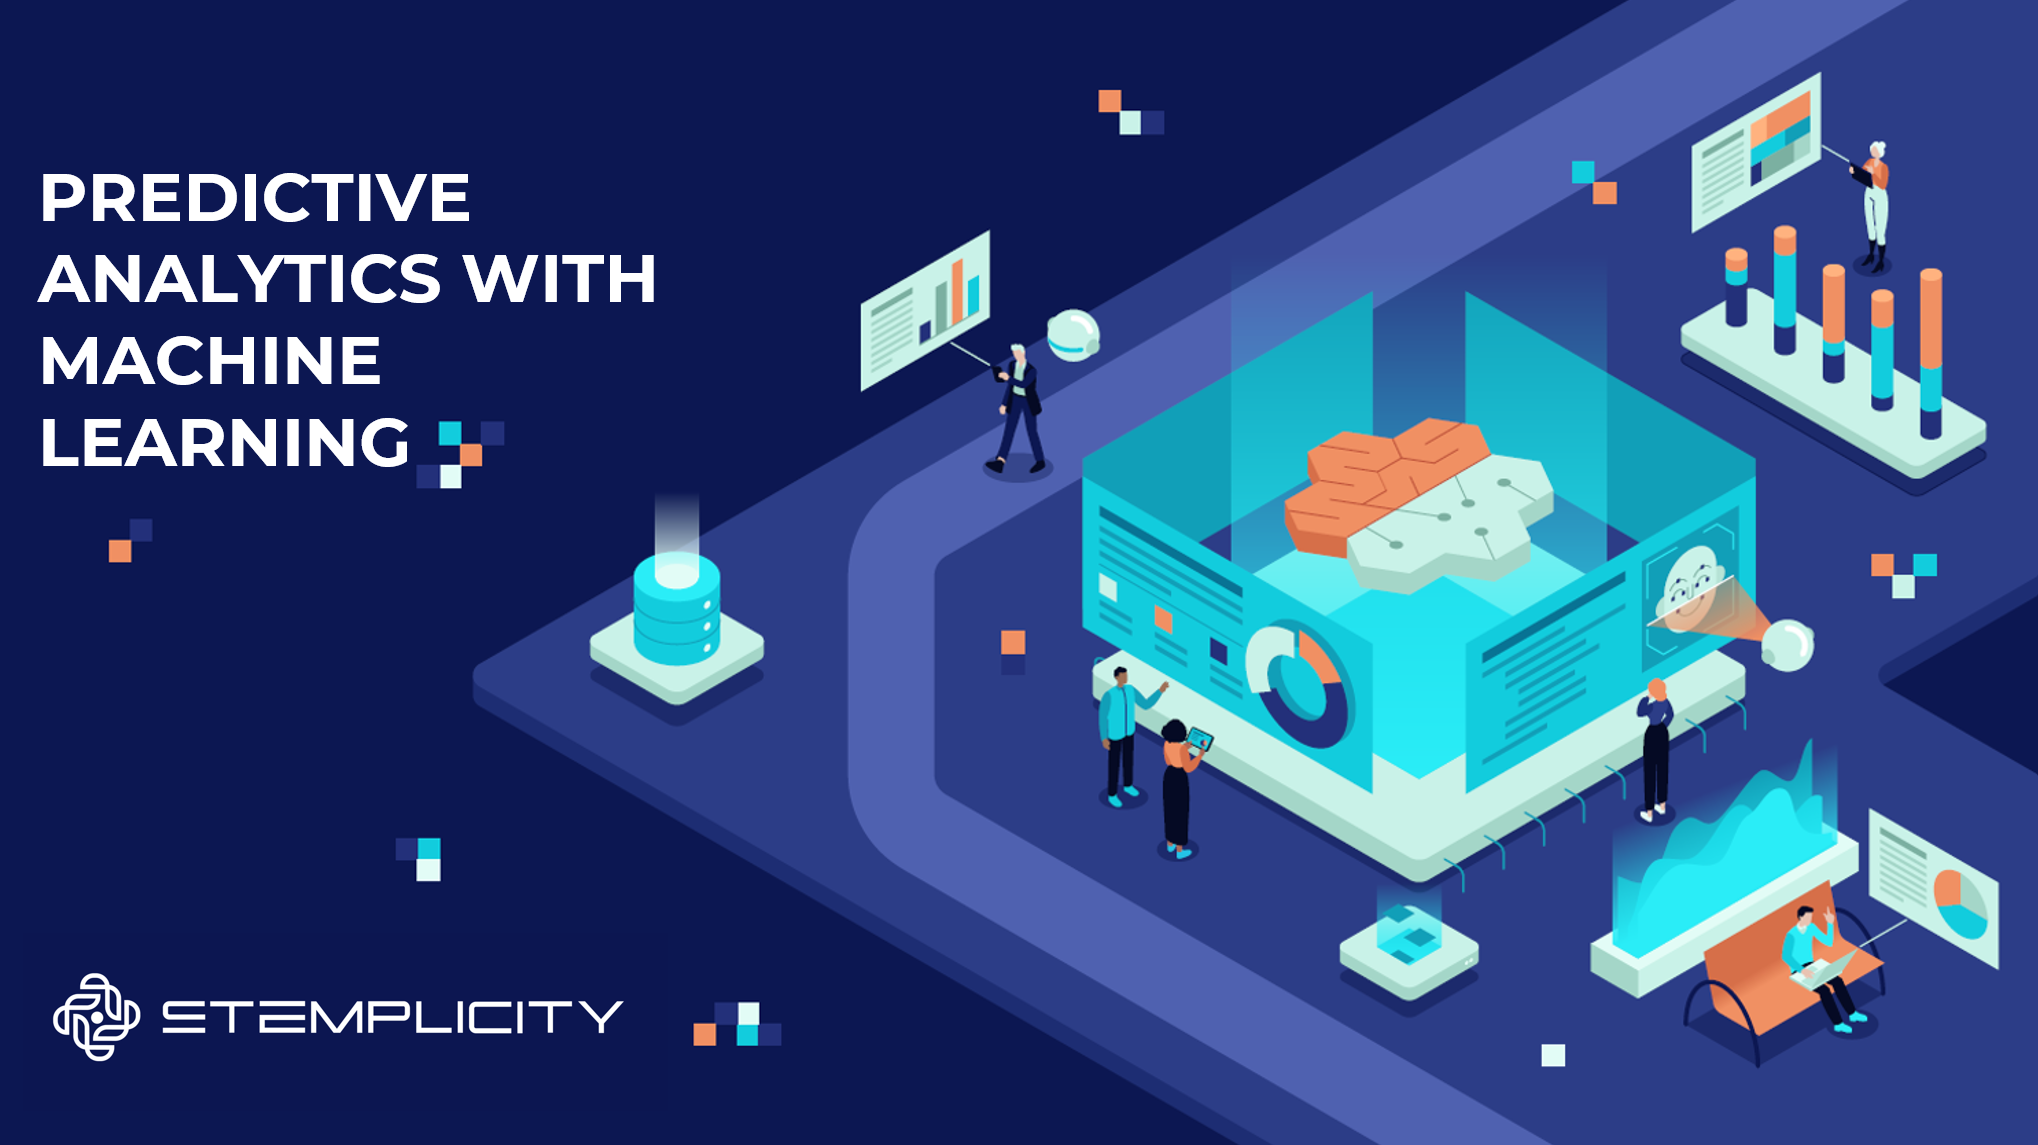

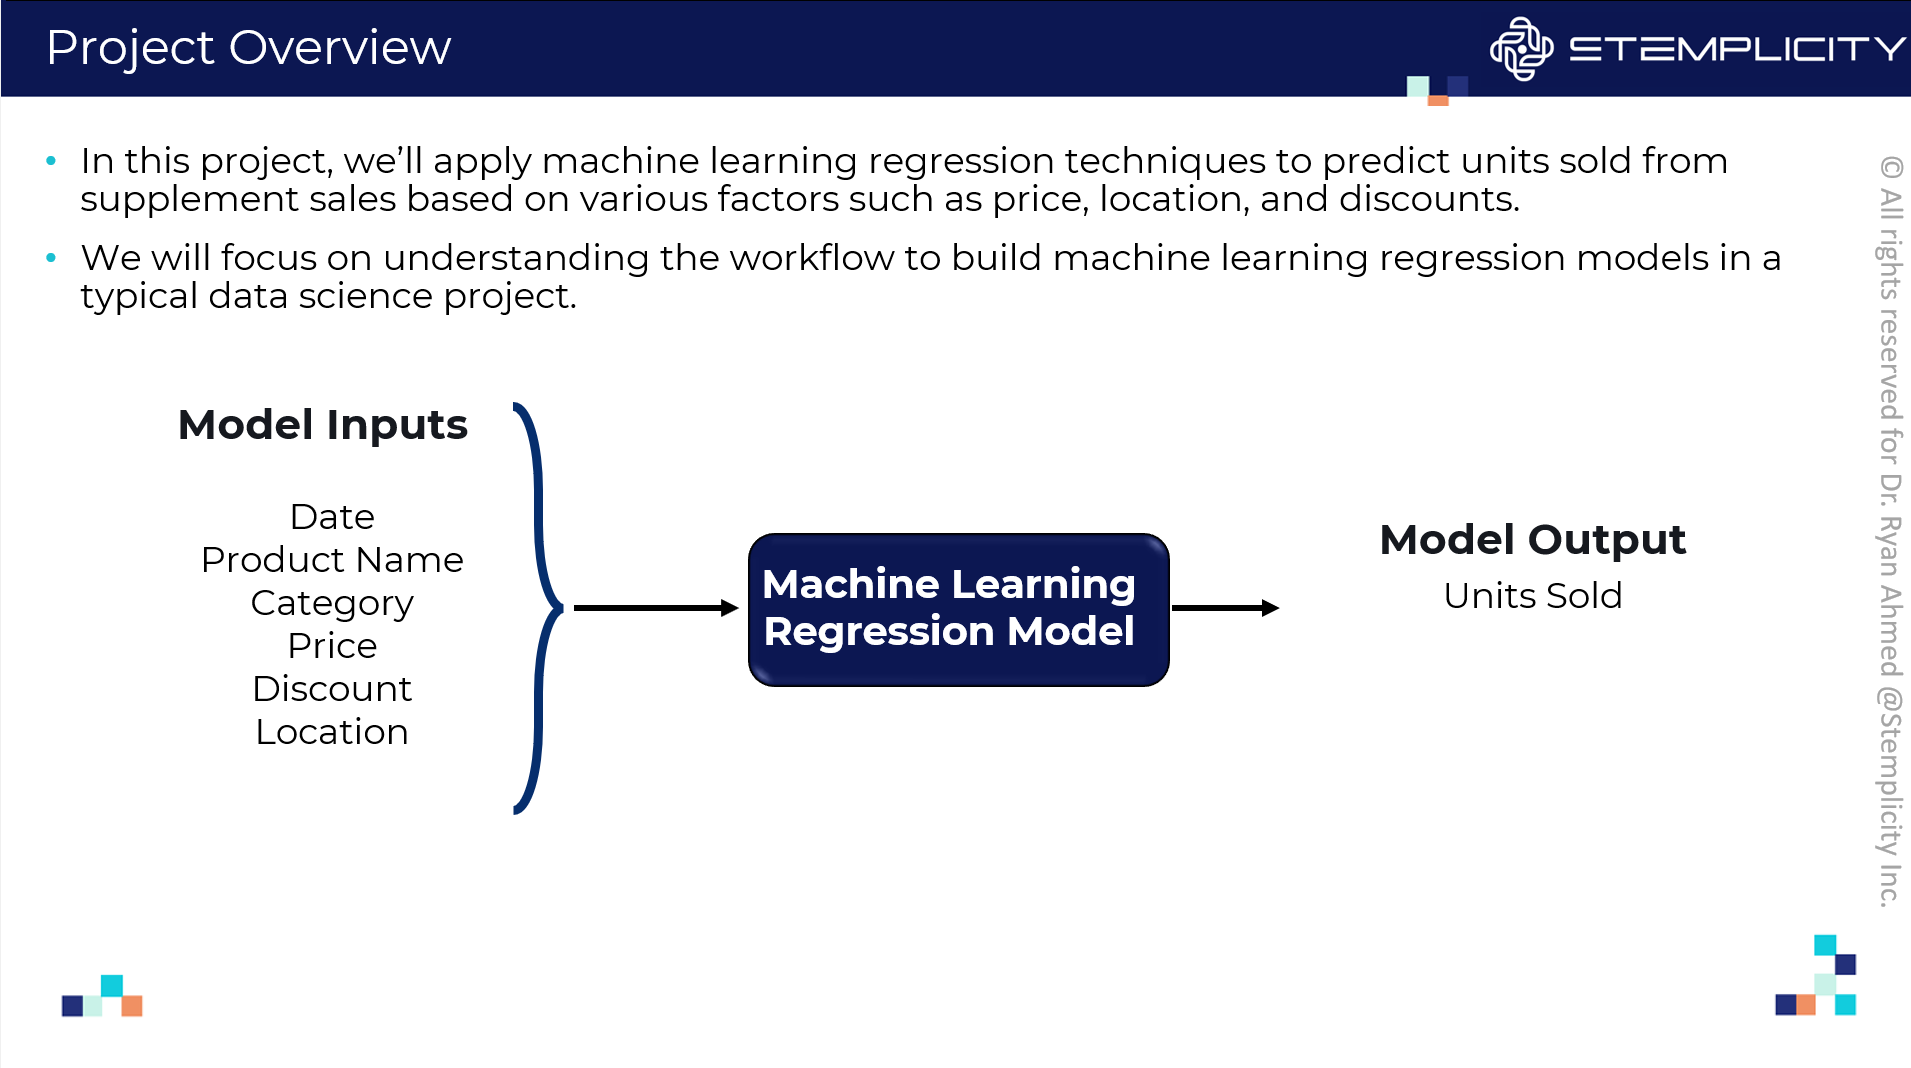

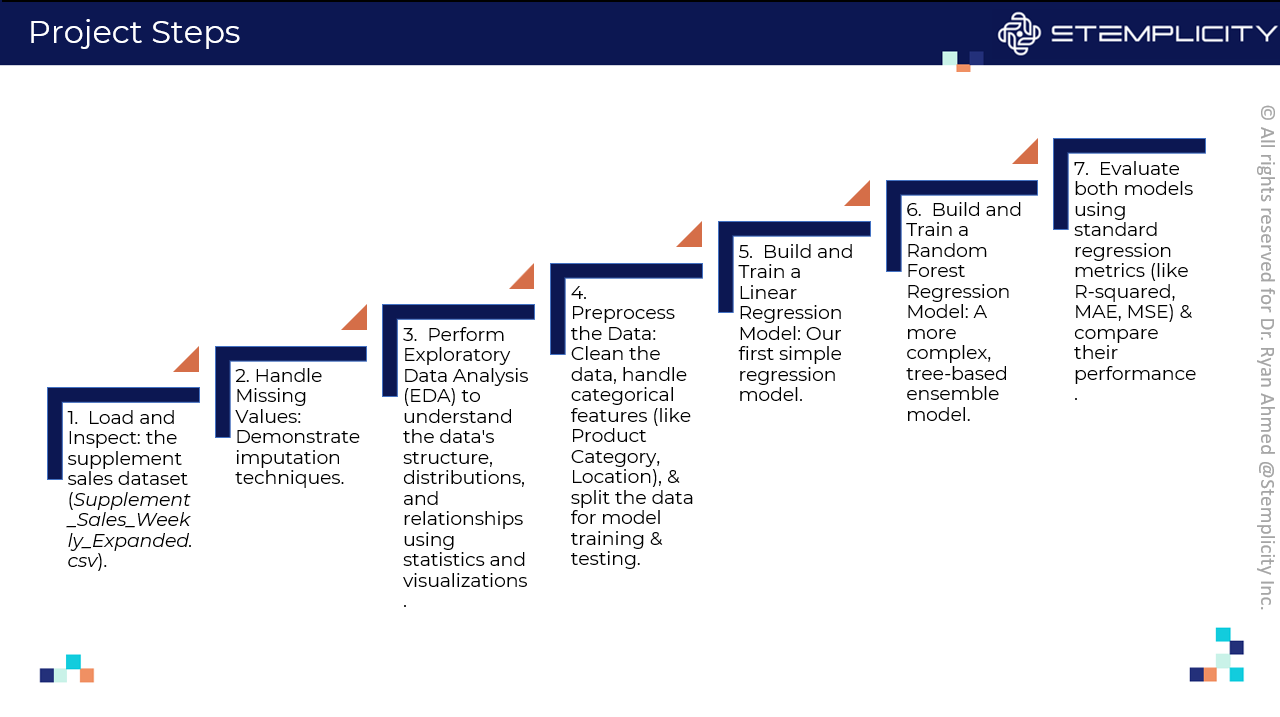

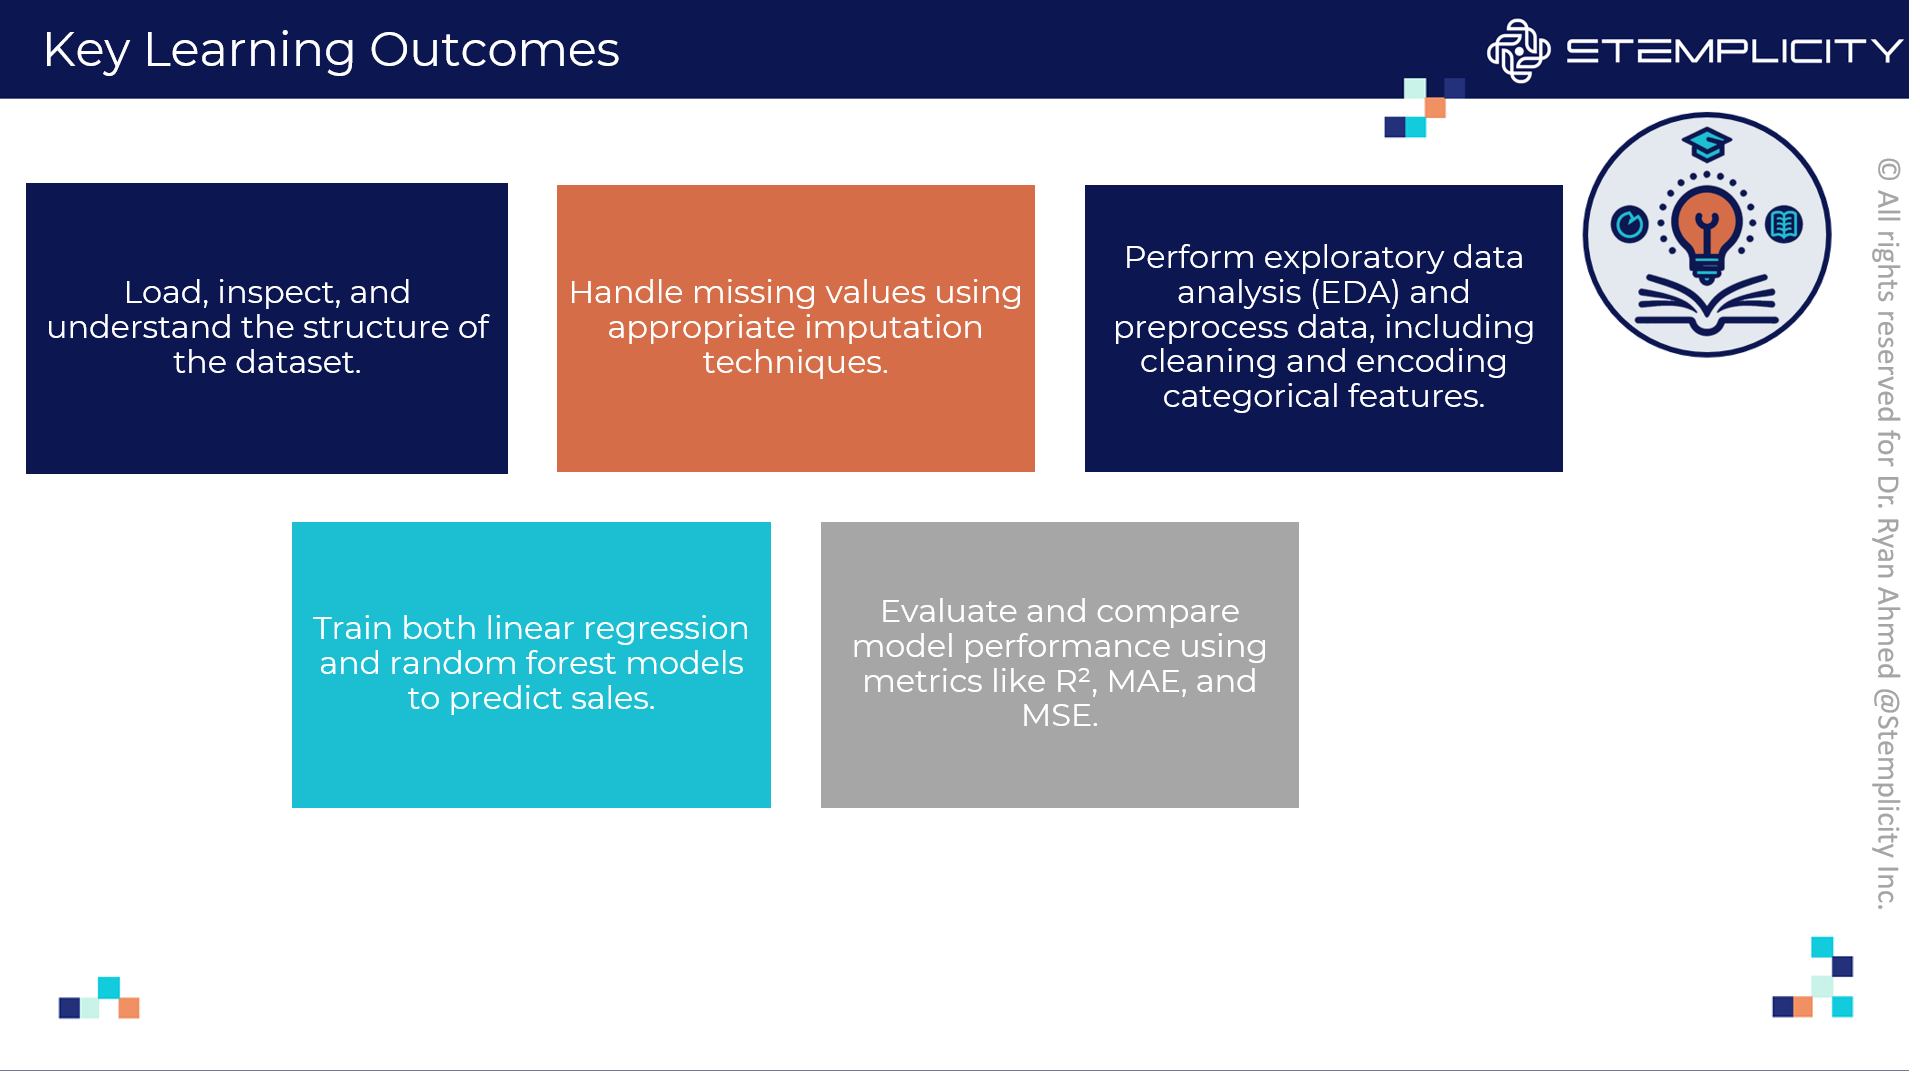

# TASK B: UNDERSTANDING THE FUNDAMENTALS OF MACHINE LEARNING REGRESSION

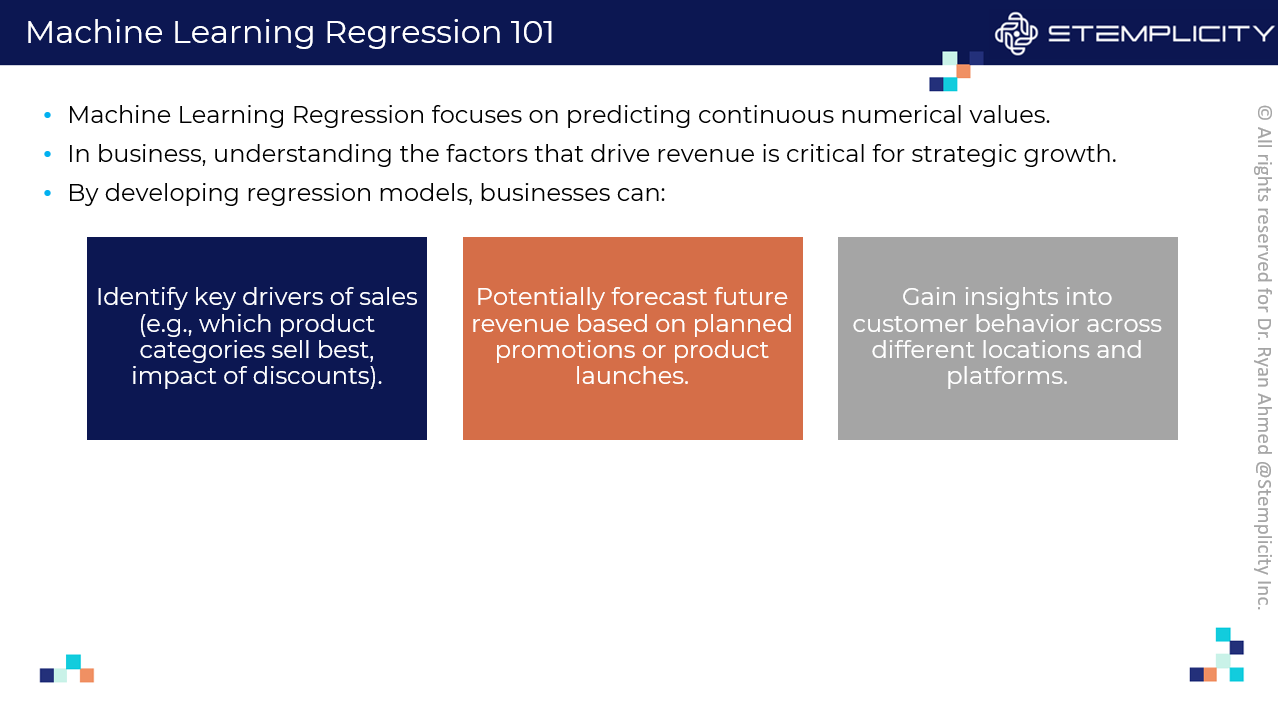

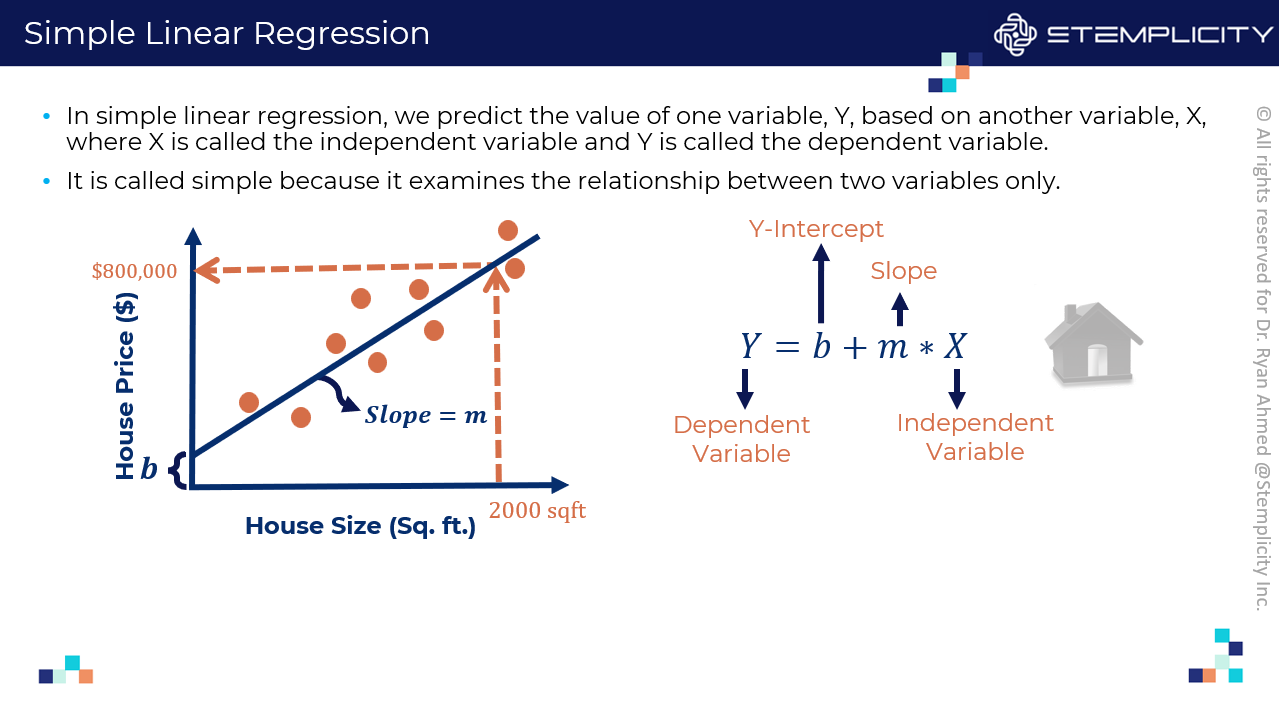

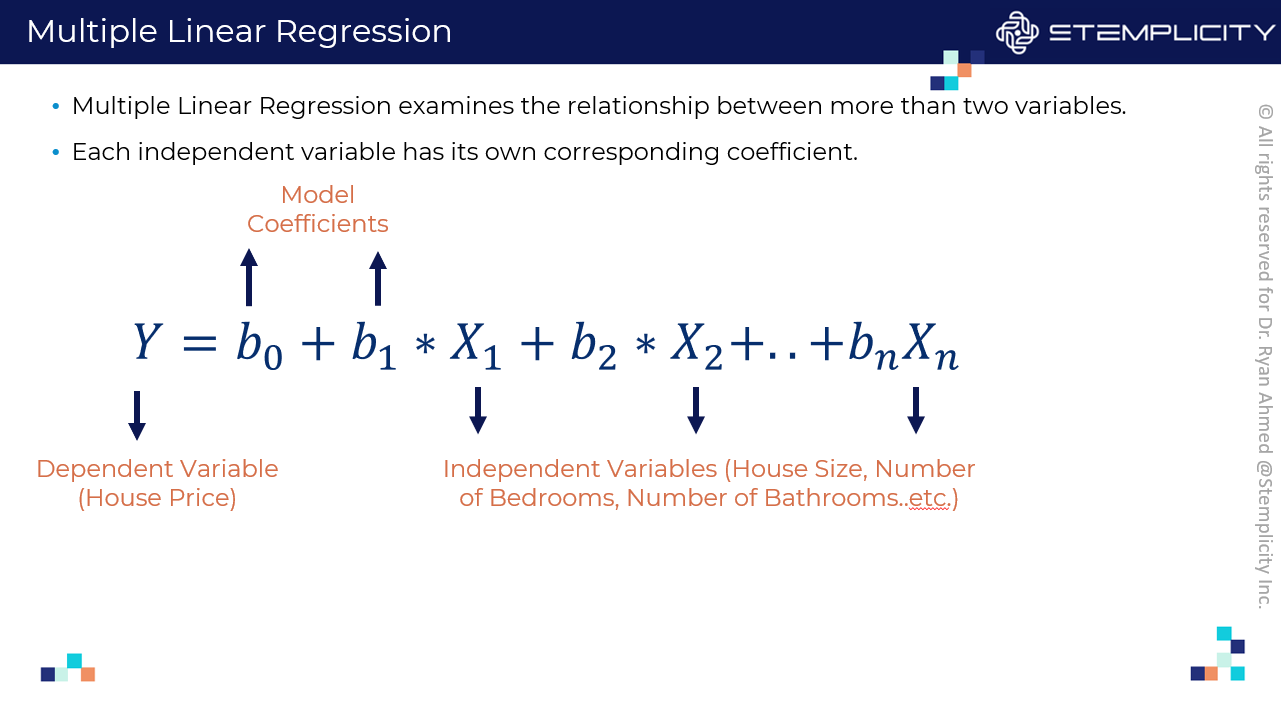

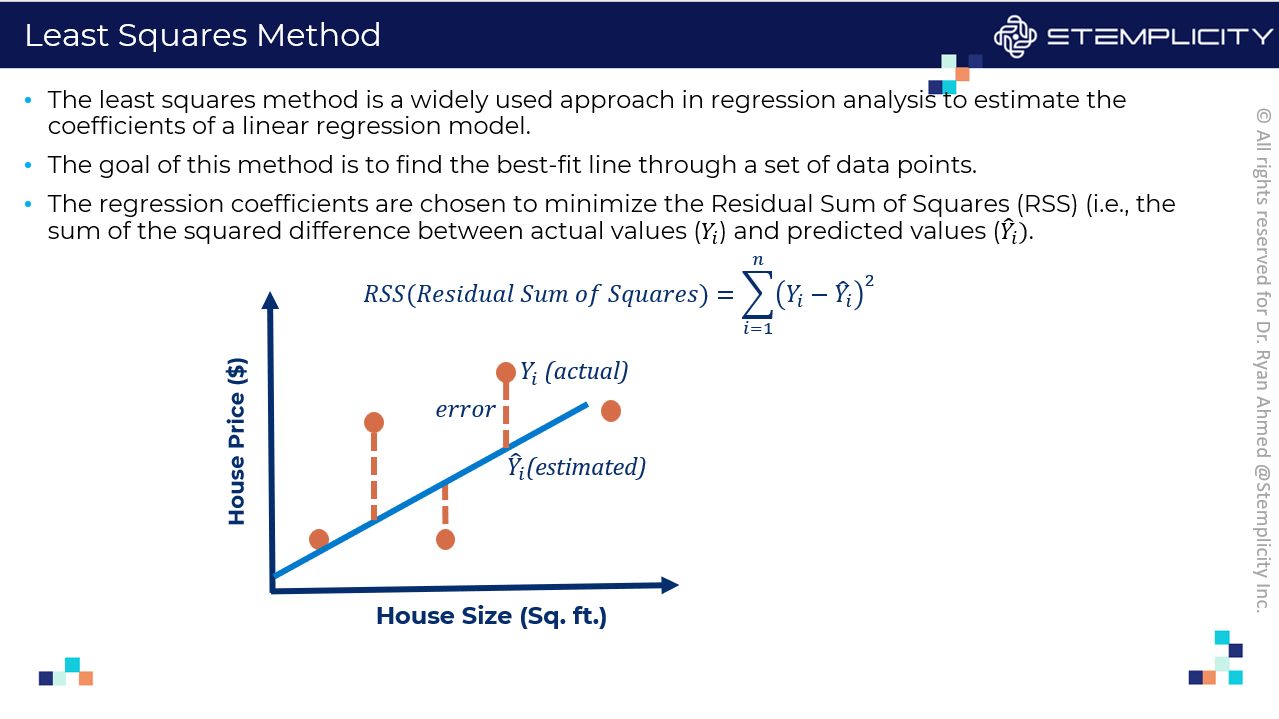

**PRACTICE OPPORTUNITY:**
- **Plot the graphs of the following linear equations:**
    - 𝑦=3∗𝑥
    - 𝑦=15−10∗𝑥

# TASK C: IMPORT KEY LIBRARIES & PERFORM DATASET INPSECTION

Let's import all our key libraries; these tools will be used for data manipulation, numerical operations, visualization, and building machine learning models.
*   **Pandas:** For loading, manipulating, and analyzing structured data (like CSV files).
*   **Numpy:** For numerical operations, especially array handling (pandas builds on numpy).
*   **Matplotlib.pyplot:** A fundamental library for creating static, interactive, and animated visualizations.
*   **Seaborn:** Built on top of matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.
*   **Scikit-Learn:** The core library for machine learning in Python. We'll use it for:
    *   `train_test_split`: Splitting data into training and testing sets.
    *   `SimpleImputer`: Handling missing values.
    *   `LinearRegression`: Implementing the linear regression model.
    *   `RandomForestRegressor`: Implementing the Random Forest model.
    *   `mean_absolute_error`, `mean_squared_error`, `r2_score`: Calculating evaluation metrics for our regression models.

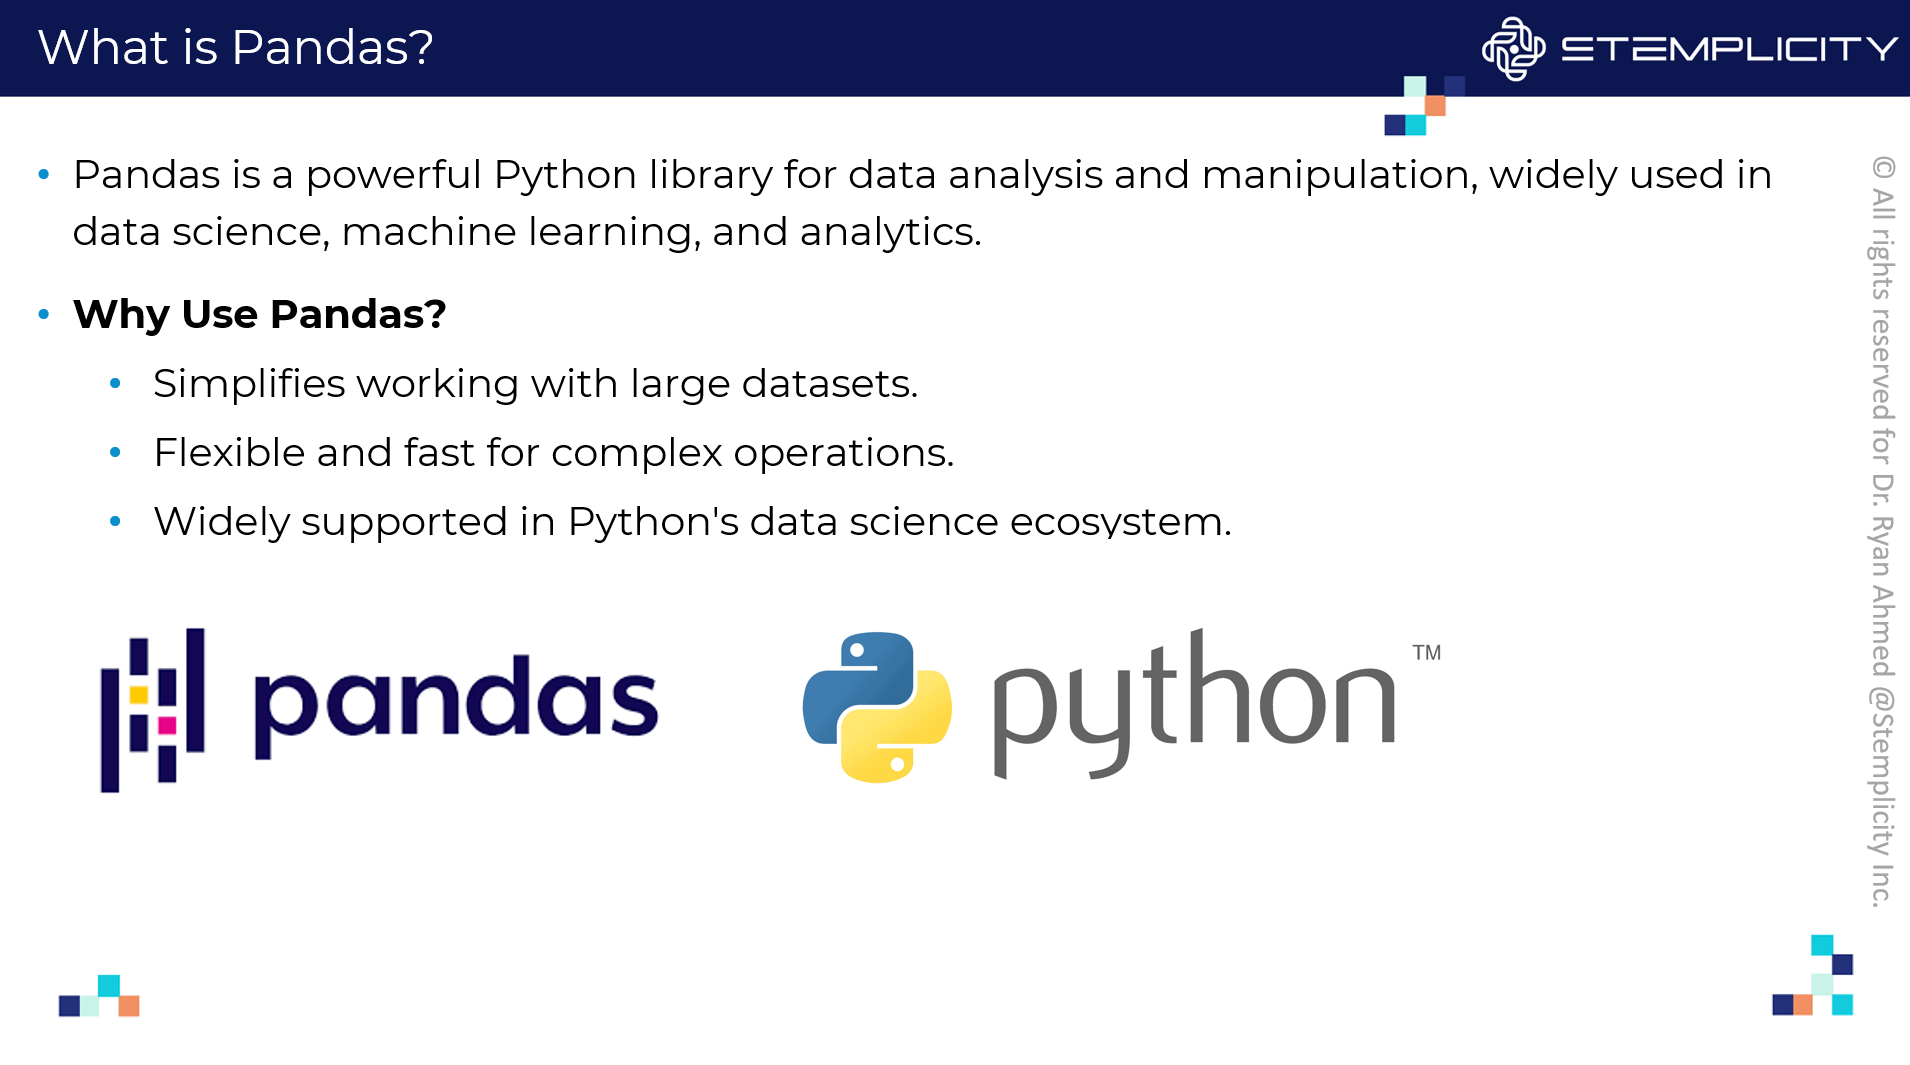

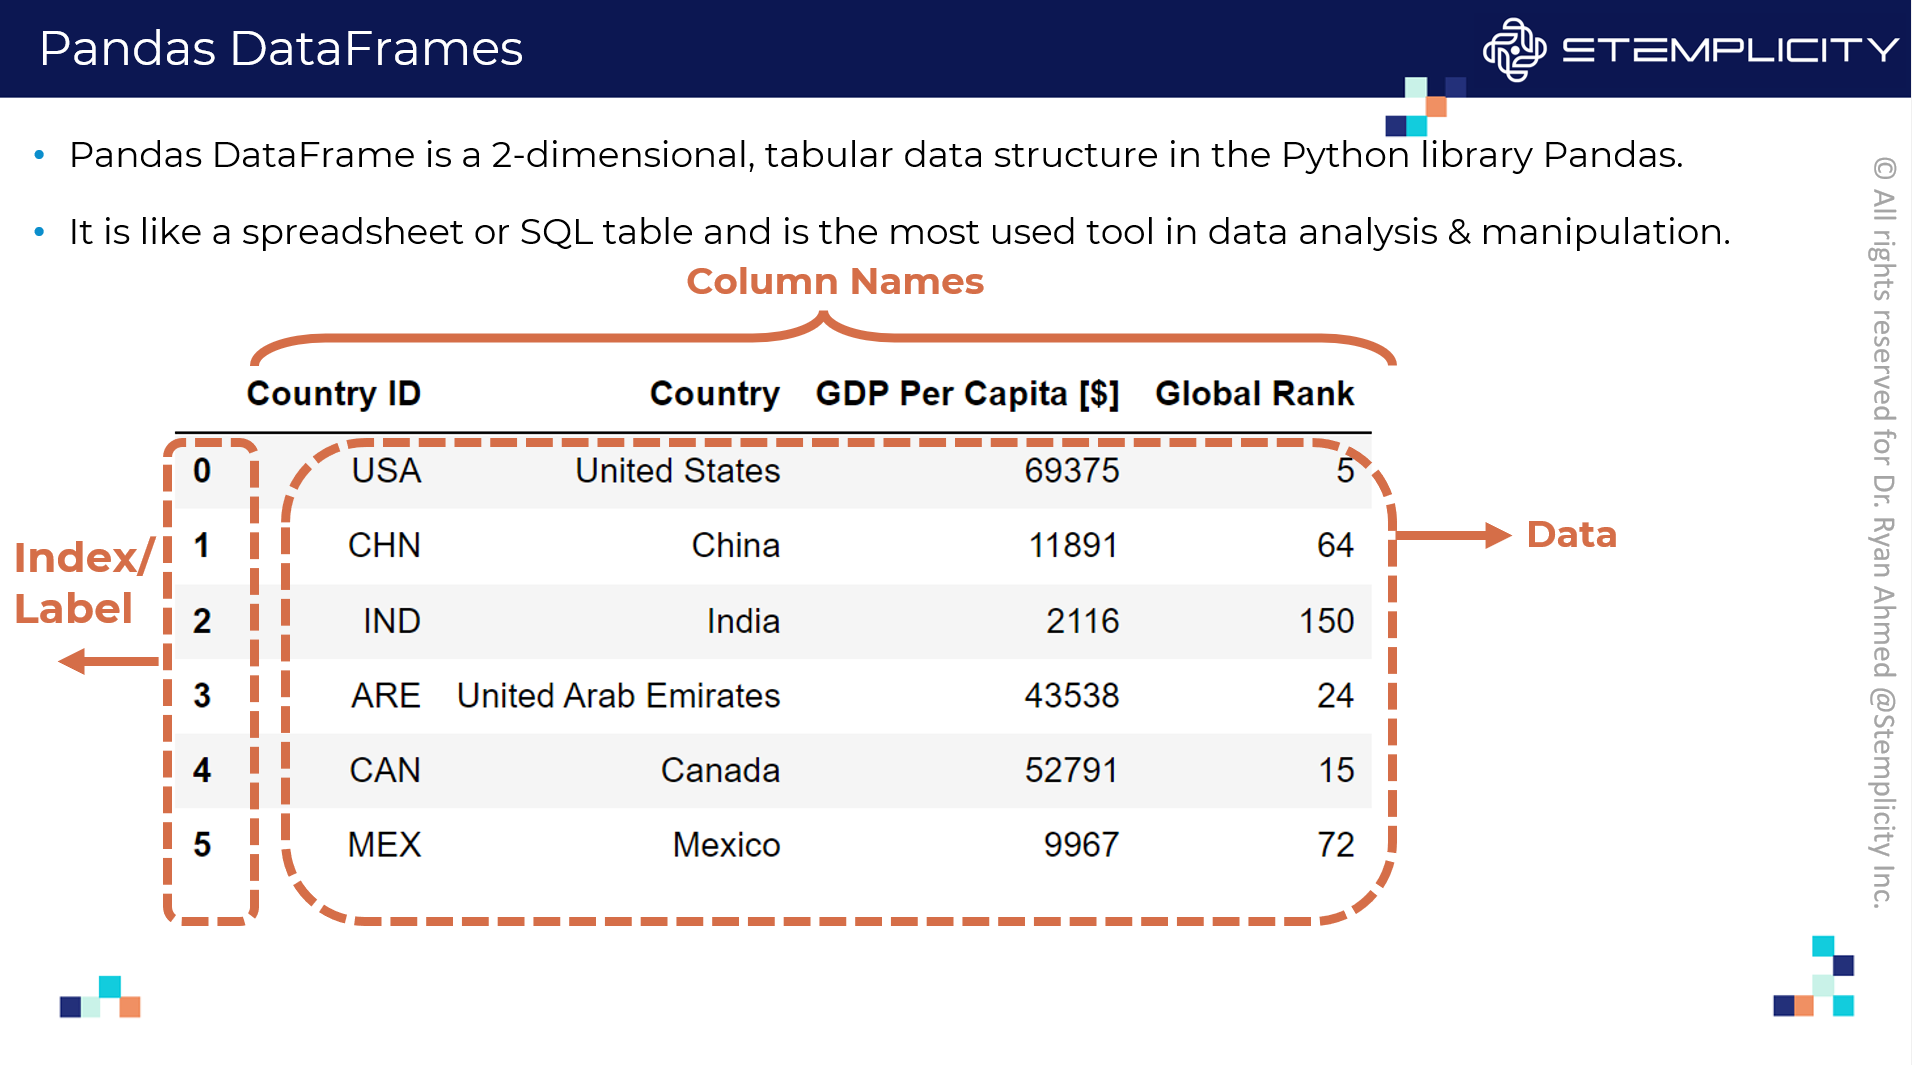

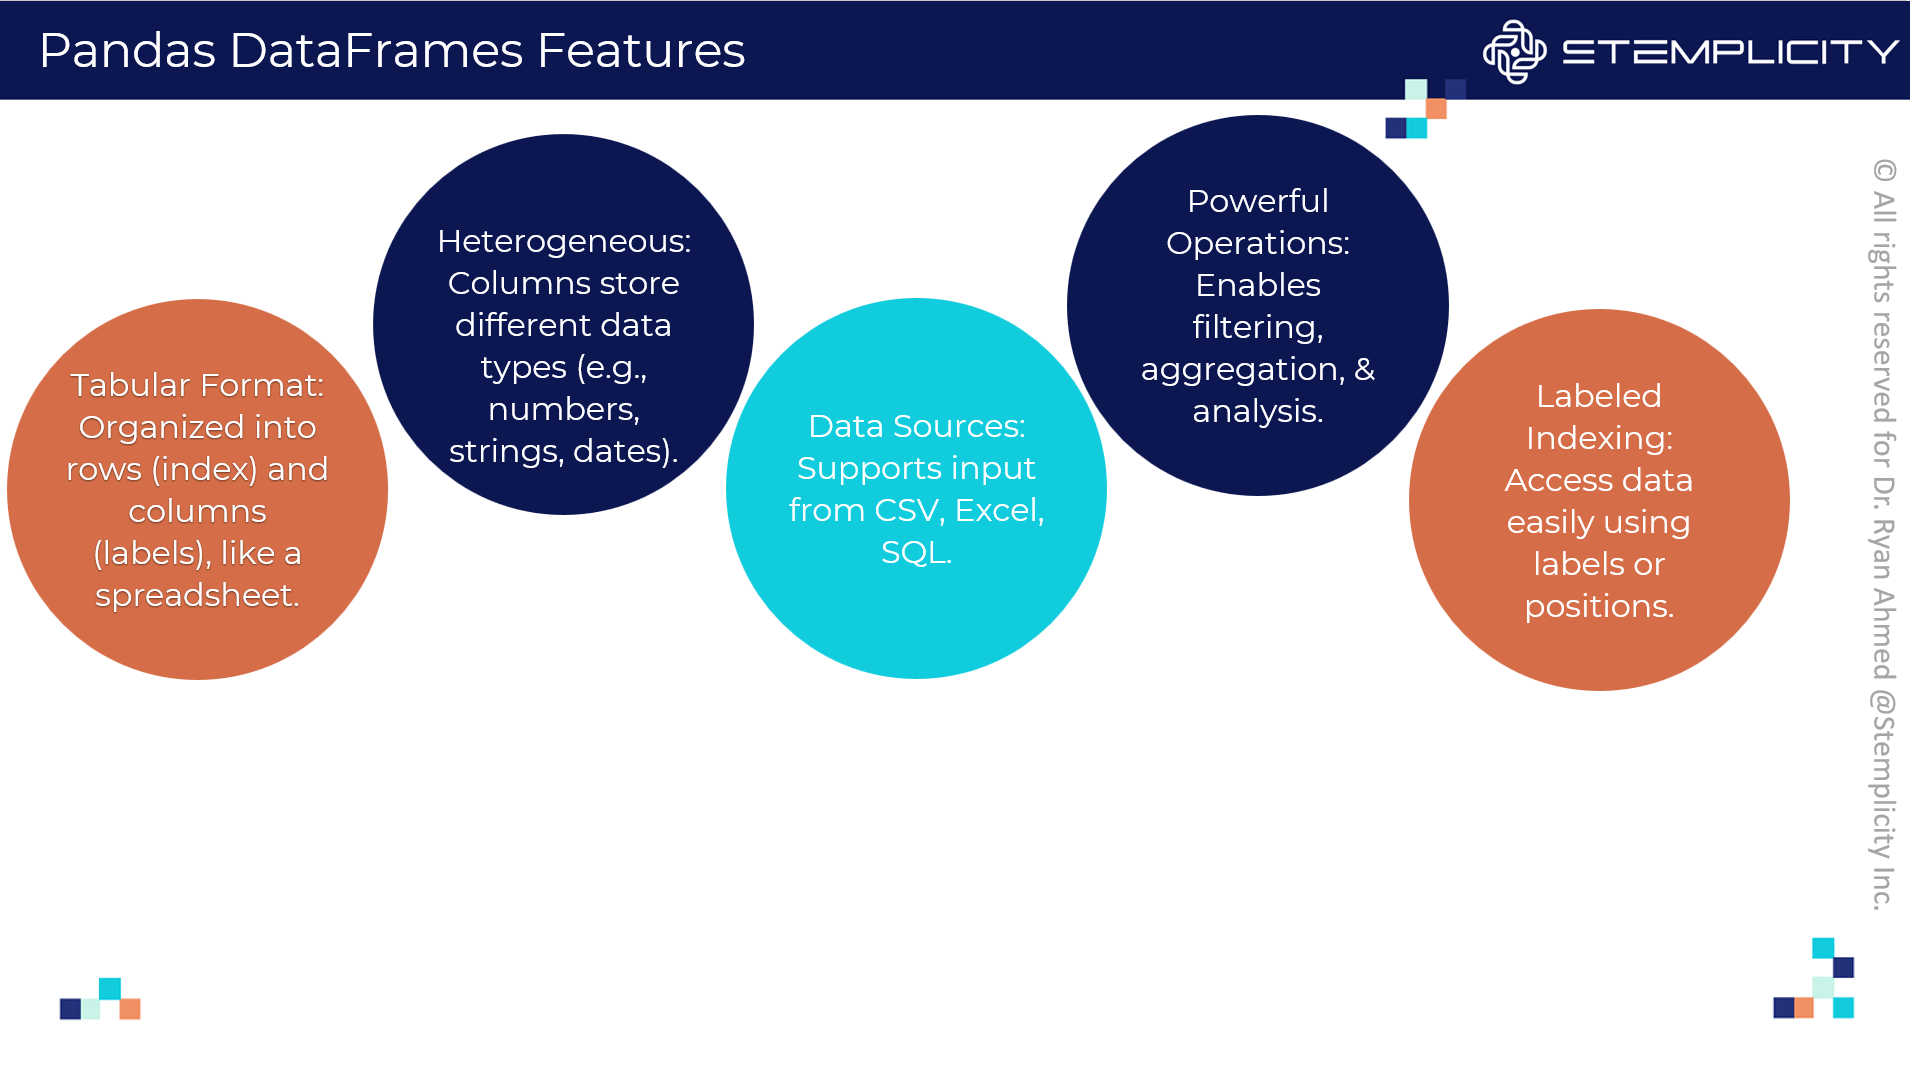

In [1]:
# Let's install Matplotlib, Scikit-Learn and Seaborn
!pip install -q matplotlib scikit-learn seaborn

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # Added for missing value handling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings  # Added to ignore potential warnings during visualization or modeling

# Configure settings for better visualization
sns.set(style ="whitegrid")  # Set a nice default style for seaborn plots
plt.rcParams["figure.figsize"] = (12, 6)  # Set default figure size for matplotlib plots
warnings.filterwarnings("ignore")  # Ignore general warnings for cleaner output

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


The first step in any data science project is to load the data and get a feel for its structure and content. We'll use pandas to load the `Supplement_Sales_Weekly_Expanded.csv` file into a DataFrame.

After loading the data, we'll perform some initial checks:
*   `.head()`: View the first few rows to see the column names and sample data.
*   `.info()`: Get a concise summary of the DataFrame, including the number of non-null entries and data types for each column. This helps identify potential missing values and incorrect data types.
*   `.describe()`: Generate descriptive statistics for numerical columns (like count, mean, standard deviation, min, max, quartiles). This gives a quick overview of the range and distribution of numerical features.
*   `.shape`: See the number of rows and columns.
*   **.isnull().sum():** Check specifically for missing values right after loading.

In [3]:
# Load the dataset from the CSV file and store it in a Pandas DataFrame titled "df"
file_path = "Supplement_Sales_Weekly.csv"
df = pd.read_csv(file_path)
print(f"Dataset loaded successfully from {file_path}")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully from Supplement_Sales_Weekly.csv
Dataset shape: 4384 rows, 8 columns


In [4]:
df

Date        Product Name     Category  Units Sold  Price  \
0     2020-01-06        Whey Protein      Protein         161  31.98   
1     2020-01-06           Vitamin C      Vitamin         135  42.51   
2     2020-01-06            Fish Oil        Omega        2604  12.91   
3     2020-01-06        Multivitamin      Vitamin         949  16.07   
4     2020-01-06         Pre-Workout  Performance         551  35.47   
...          ...                 ...          ...         ...    ...   
4379  2025-03-31           Melatonin    Sleep Aid         300  47.79   
4380  2025-03-31              Biotin      Vitamin         538  38.12   
4381  2025-03-31   Green Tea Extract   Fat Burner        1682  20.40   
4382  2025-03-31     Iron Supplement      Mineral        2093  18.31   
4383  2025-03-31  Electrolyte Powder    Hydration         606  39.12   

      Discount Location Platform  
0         0.03   Canada  Walmart  
1         0.04       UK   Amazon  
2         0.25   Canada   Amazon  
3         0.08   Canada  Walmart  
4         0.25   Canada    iHerb  
...        ...      ...      ...  
4379      0.21      USA    iHerb  
4380      0.22       UK  Walmart  
4381      0.12      USA    iHerb  
4382      0.23   Canada   Amazon  
4383      0.23       UK    iHerb  

[4384 rows x 8 columns]

In [7]:
# Let's display the first 5 rows in the data
print("\nFirst 5 rows of the dataset:")
df.head()  # Use display for better rendering in Jupyter


First 5 rows of the dataset:


Date  Product Name     Category  Units Sold  Price  Discount  \
0  2020-01-06  Whey Protein      Protein         161  31.98      0.03   
1  2020-01-06     Vitamin C      Vitamin         135  42.51      0.04   
2  2020-01-06      Fish Oil        Omega        2604  12.91      0.25   
3  2020-01-06  Multivitamin      Vitamin         949  16.07      0.08   
4  2020-01-06   Pre-Workout  Performance         551  35.47      0.25   

  Location Platform  
0   Canada  Walmart  
1       UK   Amazon  
2   Canada   Amazon  
3   Canada  Walmart  
4   Canada    iHerb

In [8]:
# Display concise summary (non-null counts, data types)
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4384 non-null   object 
 1   Product Name  4384 non-null   object 
 2   Category      4384 non-null   object 
 3   Units Sold    4384 non-null   int64  
 4   Price         4376 non-null   float64
 5   Discount      4379 non-null   float64
 6   Location      4384 non-null   object 
 7   Platform      4384 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 274.1+ KB


In [9]:
# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics (Numerical Columns):")
display(df.describe())


Descriptive Statistics (Numerical Columns):


Units Sold        Price     Discount
count  4384.000000  4376.000000  4379.000000
mean    525.950046    34.797036     0.124323
std     569.893154    14.187780     0.071822
min      16.000000    10.000000     0.000000
25%     135.000000    22.610000     0.060000
50%     312.500000    34.720000     0.120000
75%     717.250000    46.710000     0.190000
max    4869.000000    59.970000     0.250000

In [10]:
# Display descriptive statistics for categorical columns
print("\nDescriptive Statistics (Categorical Columns):")
display(df.describe(include = ["object"]))


Descriptive Statistics (Categorical Columns):


Date  Product Name Category Location Platform
count         4384          4384     4384     4384     4384
unique         274            16       10        3        3
top     2020-01-06  Whey Protein  Vitamin   Canada    iHerb
freq            16           274      822     1507     1499

In [11]:
# Locate the missing values in the Pandas DataFrame
df.isnull()

Date  Product Name  Category  Units Sold  Price  Discount  Location  \
0     False         False     False       False  False     False     False   
1     False         False     False       False  False     False     False   
2     False         False     False       False  False     False     False   
3     False         False     False       False  False     False     False   
4     False         False     False       False  False     False     False   
...     ...           ...       ...         ...    ...       ...       ...   
4379  False         False     False       False  False     False     False   
4380  False         False     False       False  False     False     False   
4381  False         False     False       False  False     False     False   
4382  False         False     False       False  False     False     False   
4383  False         False     False       False  False     False     False   

      Platform  
0        False  
1        False  
2        False  
3        False  
4        False  
...        ...  
4379     False  
4380     False  
4381     False  
4382     False  
4383     False  

[4384 rows x 8 columns]

In [12]:
# Explicitly check for missing values right after loading
print("\nInitial check for missing values:")
print(df.isnull().sum())


Initial check for missing values:
Date            0
Product Name    0
Category        0
Units Sold      0
Price           8
Discount        5
Location        0
Platform        0
dtype: int64


**PRACTICE OPPORTUNITY:**
- **Use Pandas methods to display the last 10 rows of the Pandas DataFrame df**
- **How many unique products exist in this DataFrame?**
- **List the number of countries and platforms that exist in the Pandas DataFrame**

# TASK D: HANDLING MISSING VALUES

Now that we've identified missing values, we need to address them because leaving `NaN` values in the dataset will cause errors during model training. Common strategies include:
*   **Dropping:** Remove rows or columns with missing values. This is simple, but can lead to significant data loss if many values are missing. Generally not recommended unless the proportion of missing data is tiny or a column is mostly empty.
*   **Imputation:** Replace missing values with estimated or calculated values. Common imputation techniques include:
    *   **Mean Imputation:** Replace missing numerical values with the mean of the column. Sensitive to outliers.
    *   **Median Imputation:** Replace missing numerical values with the median of the column. More robust to outliers than the mean.
    *   **Mode Imputation:** Replace missing categorical values with the mode (most frequent value) of the column.
    *   **More Advanced:** Regression imputation, K-Nearest Neighbors (KNN) imputation, etc. (beyond the scope of this project).
For our numerical columns `Price` and `Discount`, **median imputation** is often a good starting point as it's less affected by unusually high or low values (outliers). We'll use scikit-learn's `SimpleImputer`.


In [22]:

print("Handling missing values using Median Imputation...")

# Identify columns with missing values (should be Price and Discount now)
cols_with_missing = ["Price", "Discount"]

# Initialize the SimpleImputer with the 'median' strategy
# Note: We fit the imputer ONLY on the training data later during preprocessing,
# but for simplicity in this isolated task, we'll fit/transform the whole df.
# A more rigorous approach splits data first, then imputes.
# However, demonstrating the imputation mechanism here is the goal.
median_imputer = SimpleImputer(strategy = "median")

# Apply the imputer to the selected columns
# .fit_transform() calculates the median and replaces NaNs in one step
# Important: It returns a NumPy array, so we need to put it back into the DataFrame
df[cols_with_missing] = median_imputer.fit_transform(df[cols_with_missing])

print("\nMissing values after Median Imputation:")
print(df.isnull().sum())

if df[cols_with_missing].isnull().sum().sum() == 0:
    print("\nMissing values in 'Price' and 'Discount' successfully imputed.")
else:
    print("\nWarning: Missing values still detected after imputation attempt.")

Handling missing values using Median Imputation...

Missing values after Median Imputation:
Date            0
Product Name    0
Category        0
Units Sold      0
Price           0
Discount        0
Location        0
Platform        0
dtype: int64

Missing values in 'Price' and 'Discount' successfully imputed.


**PRACTICE OPPORTUNITY:**
- **Load the raw dataset again and put the result in a Pandas DataFrame titled `df_practice_opportunity`.**
- **Leverage the `mean` strategy to perform data imputation instead of the `median` strategy.**
- **Since the missing values are very few, we can drop the rows with missing values. Try using `df.dropna()` to drop the rows with missing values.**

# TASK E: PERFORM EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

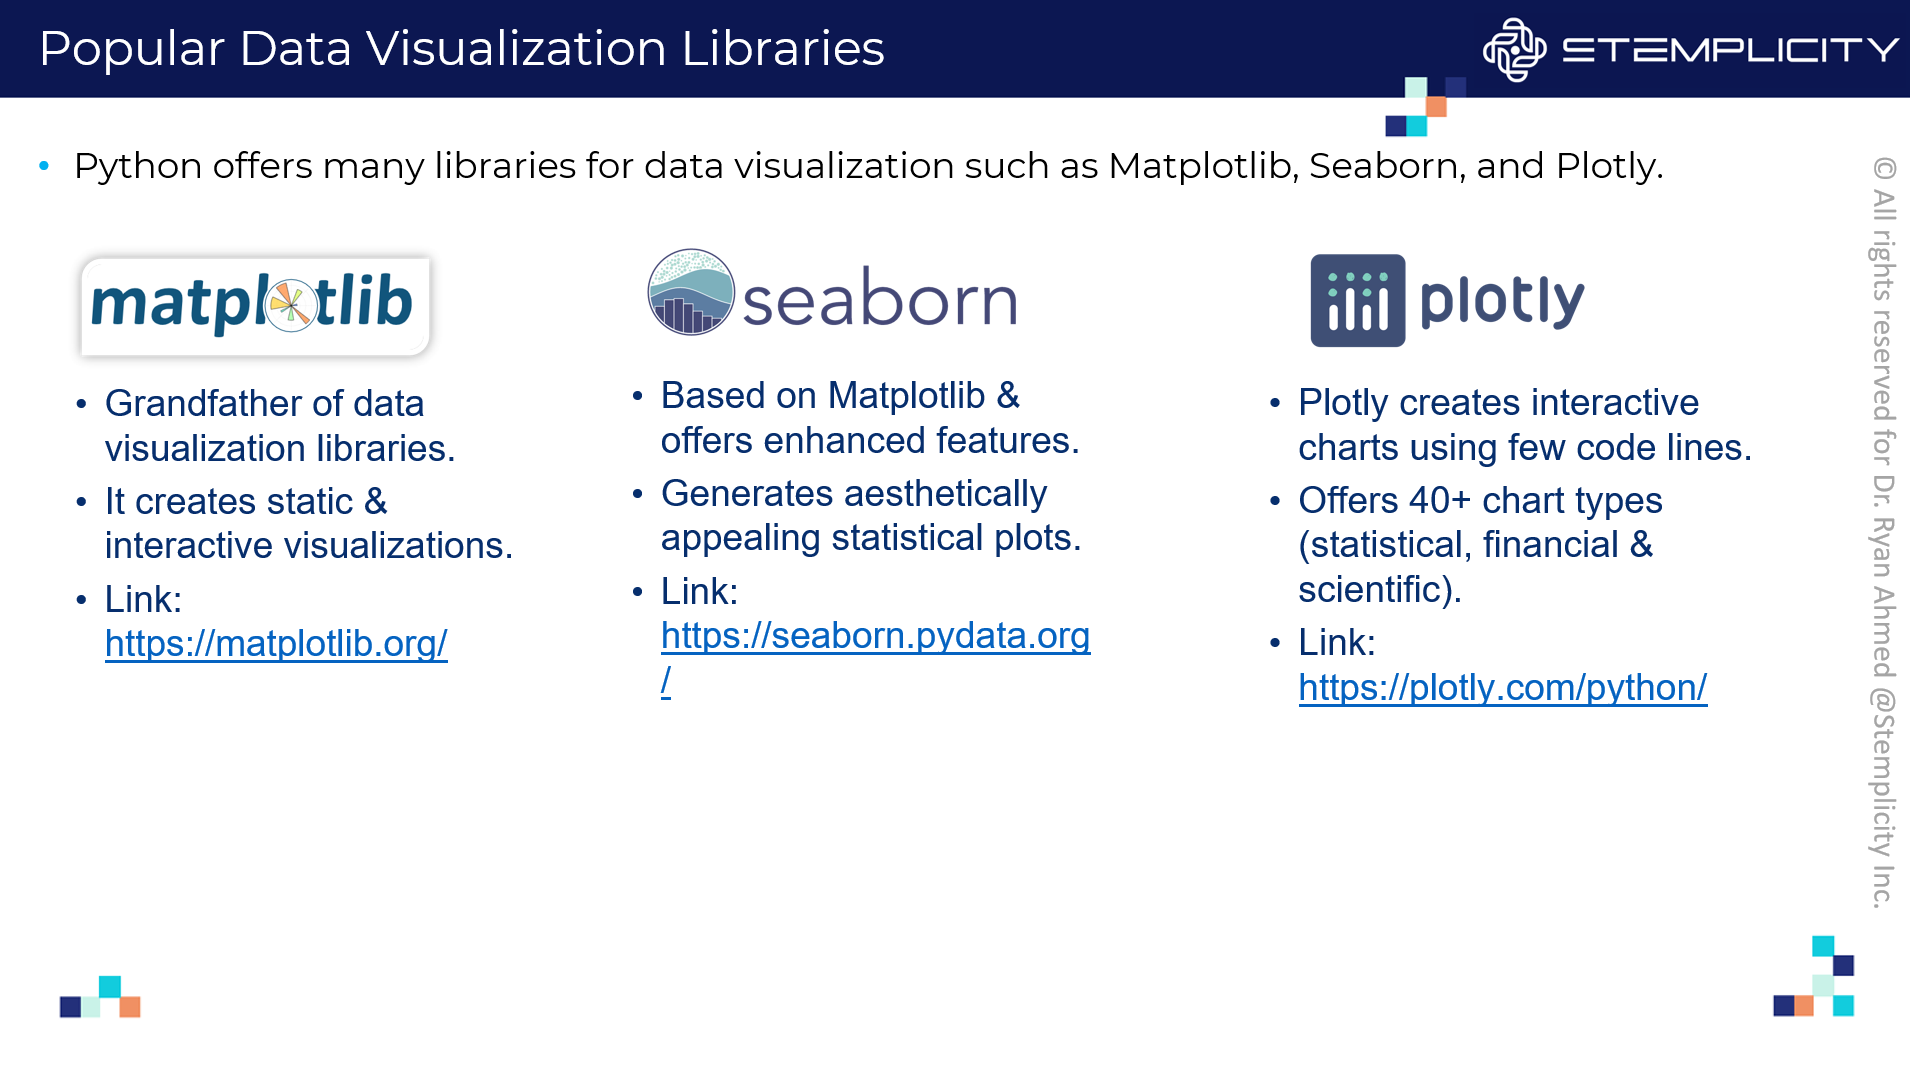

- **Matplotlib Documentation: https://matplotlib.org/**
- **Seaborn Documentation: https://seaborn.pydata.org/**
- **Plotly Documentation: https://plotly.com/python/**

Exploratory Data Analysis (EDA) is a critical step to understand the data deeply before modeling. We'll explore patterns, identify potential issues, and gain insights now that missing values are handled.

**Steps:**
1.  **Target Variable Analysis (`Units Sold`):** Understand the distribution of our target variable. Is it skewed? This might affect model performance. A histogram is useful here.
2.  **Numerical Feature Analysis:** Examine the distributions of key numerical predictors like  `Price` (now imputed), `Discount` (now imputed), using histograms or box plots.
3.  **Categorical Feature Analysis:** Understand the frequency of different categories in columns like `Category`, `Location`, and `Platform` using count plots (bar charts).
4.  **Relationship Analysis:**
    *   **Numerical vs. Target:** How do numerical features correlate with `Units Sold`? Scatter plots and a correlation heatmap are excellent tools.
    *   **Categorical vs. Target:** Does `Units Sold` differ significantly across different categories (e.g., average revenue per product `Category` or `Location`)? Box plots or violin plots are helpful.

Let's start exploring!

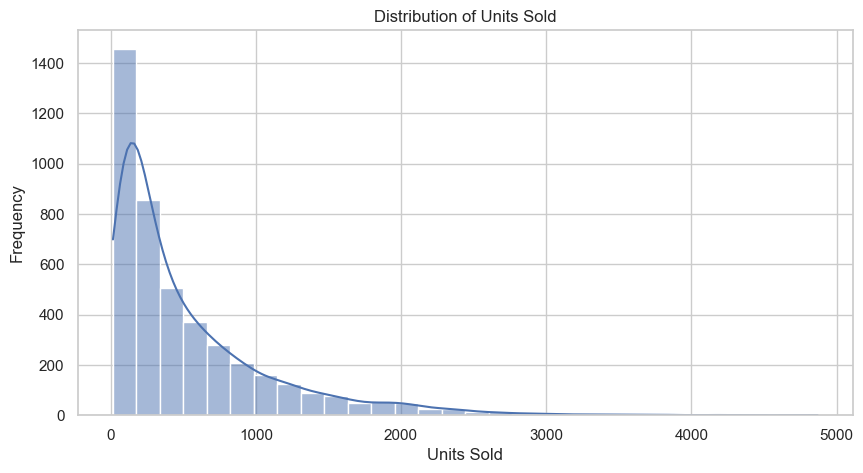

Units Sold Skewness: 2.05


In [26]:
# Let's Analyze the distribution of the target variable (Units Sold)
# If skewness is high (e.g., > 1 or < -1), a log transform might be considered later.
plt.figure(figsize=(10, 5))
sns.histplot(df["Units Sold"], kde = True, bins = 30)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

print(f"Units Sold Skewness: {df['Units Sold'].skew():.2f}")


Analyzing distributions of key numerical features (after imputation):


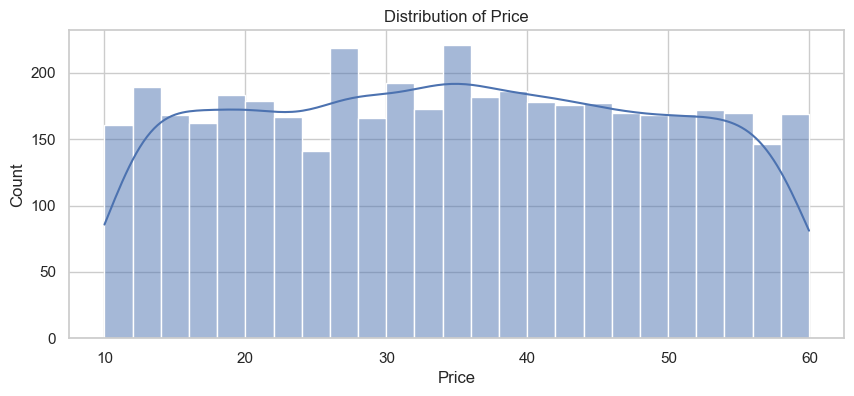

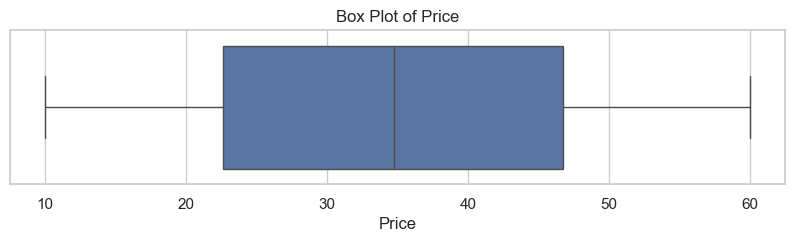

----------------------------------------------------------------------------------------------------------------------------------


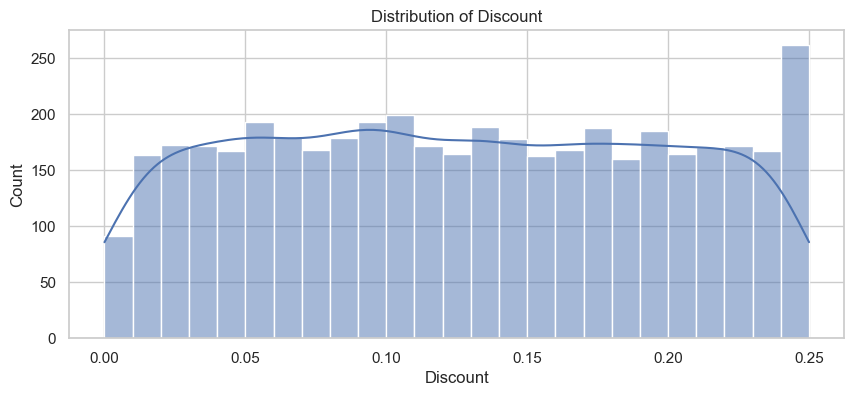

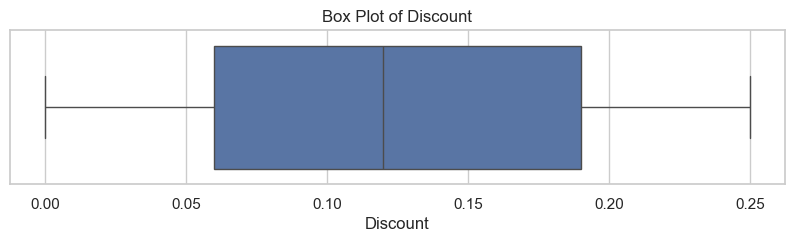

----------------------------------------------------------------------------------------------------------------------------------


In [27]:
# Let's visualize the Numerical Features such as "Price" and "Discount"
# For each feature, we will plot the histogram and the boxplot
numerical_features = [ "Price", "Discount"]  # These should now be imputed
print("\nAnalyzing distributions of key numerical features (after imputation):")

for col in numerical_features:
    plt.figure(figsize = (10, 4))
    sns.histplot(df[col], kde = True, bins = 25)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize = (10, 2))
    sns.boxplot(x = df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()
    print("-" * 130)


Analyzing distributions of categorical features:


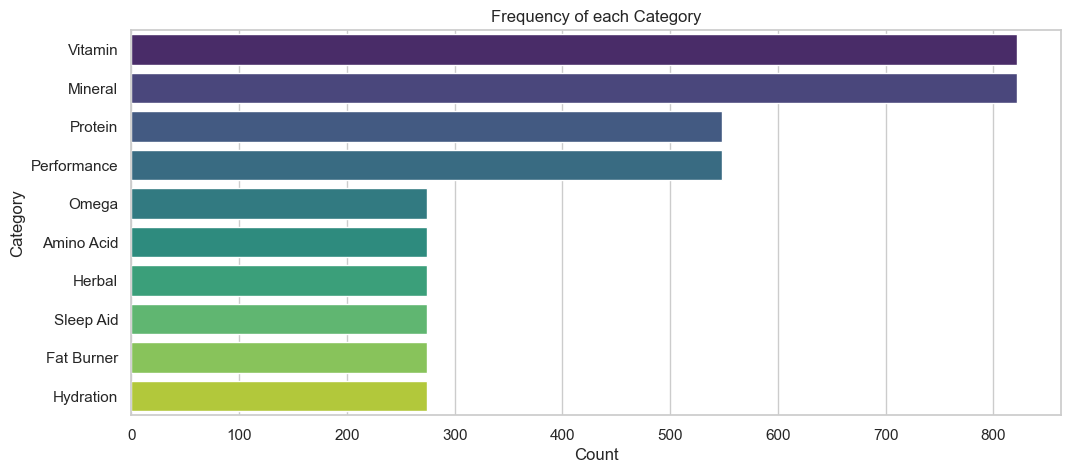

----------------------------------------------------------------------------------------------------------------------------------


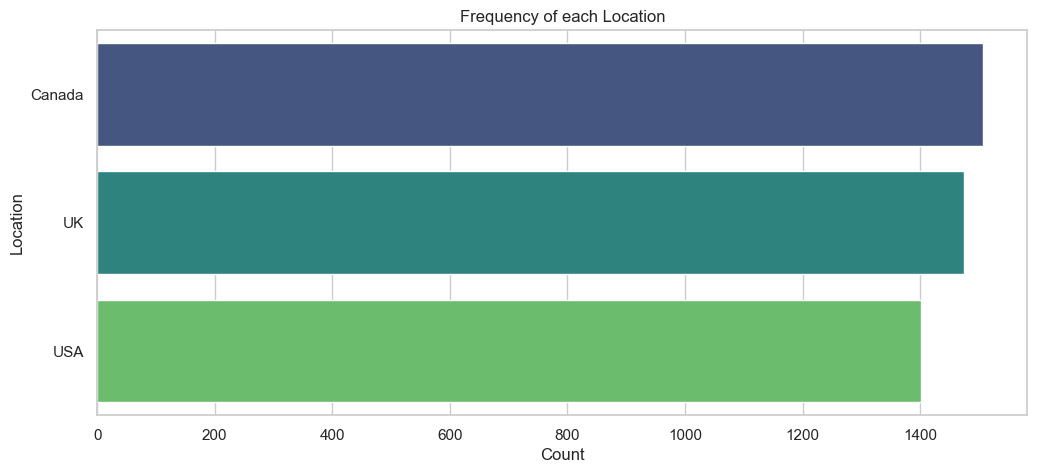

----------------------------------------------------------------------------------------------------------------------------------


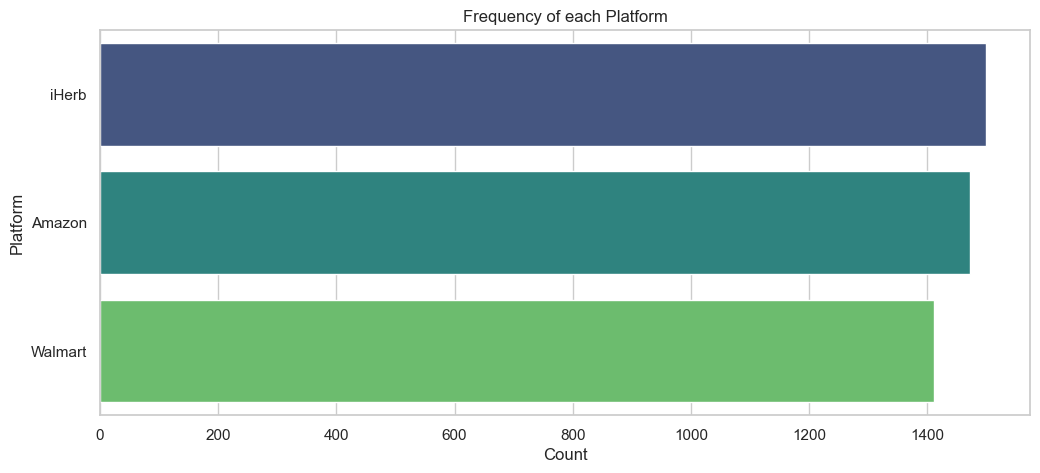

----------------------------------------------------------------------------------------------------------------------------------


In [28]:
# Let's analyze categorical features (Category, Location, Platform)
categorical_features = ["Category", "Location", "Platform"]
print("\nAnalyzing distributions of categorical features:")

for col in categorical_features:
    plt.figure(figsize = (12, 5))
    sns.countplot(y = df[col], order = df[col].value_counts().index, palette = "viridis")  # Use y for horizontal bars if many categories
    plt.title(f"Frequency of each {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()
    print("-" * 130)


Analyzing relationships between numerical features and Revenue:


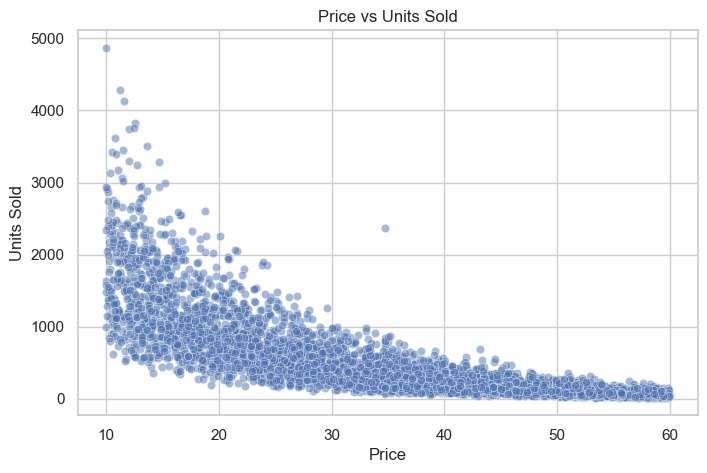

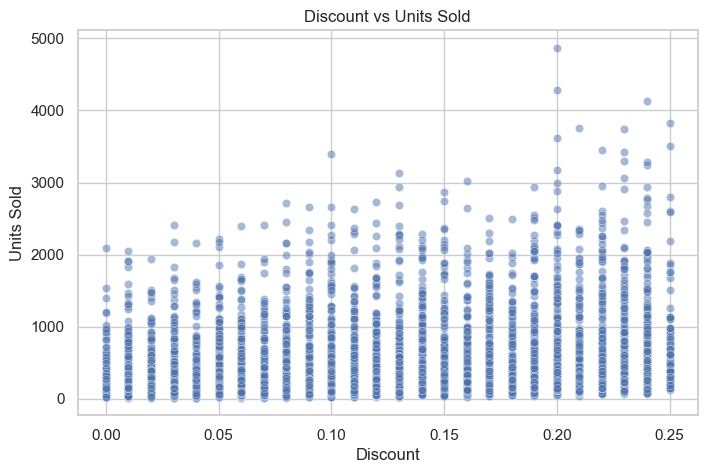

In [29]:
# Let's view the scatterplot between Numerical vs. Target (Units Sold)
print("\nAnalyzing relationships between numerical features and Revenue:")
numerical_predictors = ["Price", "Discount"]

for col in numerical_predictors:
    plt.figure(figsize = (8, 5))
    sns.scatterplot(x = df[col], y = df["Units Sold"], alpha = 0.5)  # Added alpha for density
    plt.title(f"{col} vs Units Sold")
    plt.show()


Correlation Matrix Heatmap (Numerical Features including Revenue):


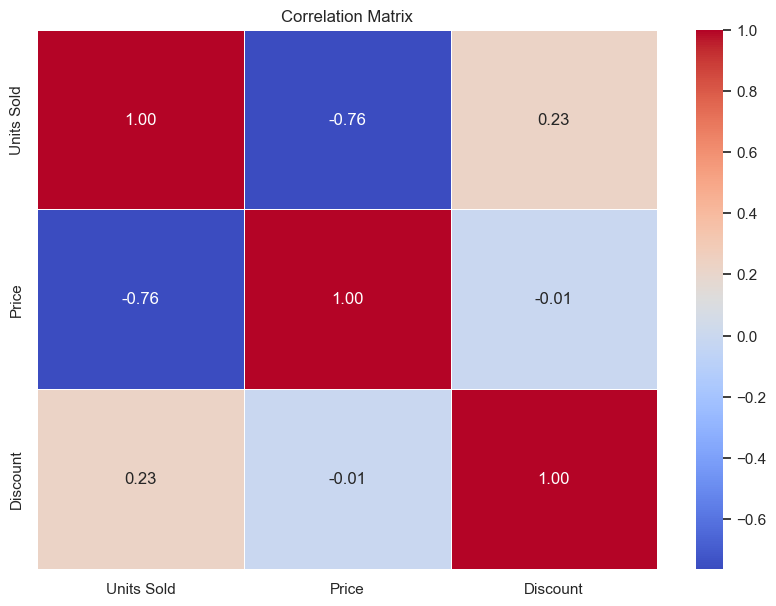

In [30]:
# Let's view the correlation heatmap (only for numerical columns)
print("\nCorrelation Matrix Heatmap (Numerical Features including Revenue):")

# Ensure we only select numeric types for correlation calculation
numeric_df = df.select_dtypes(include = np.number)
plt.figure(figsize = (10, 7))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()



Analyzing relationships between categorical features and Revenue:


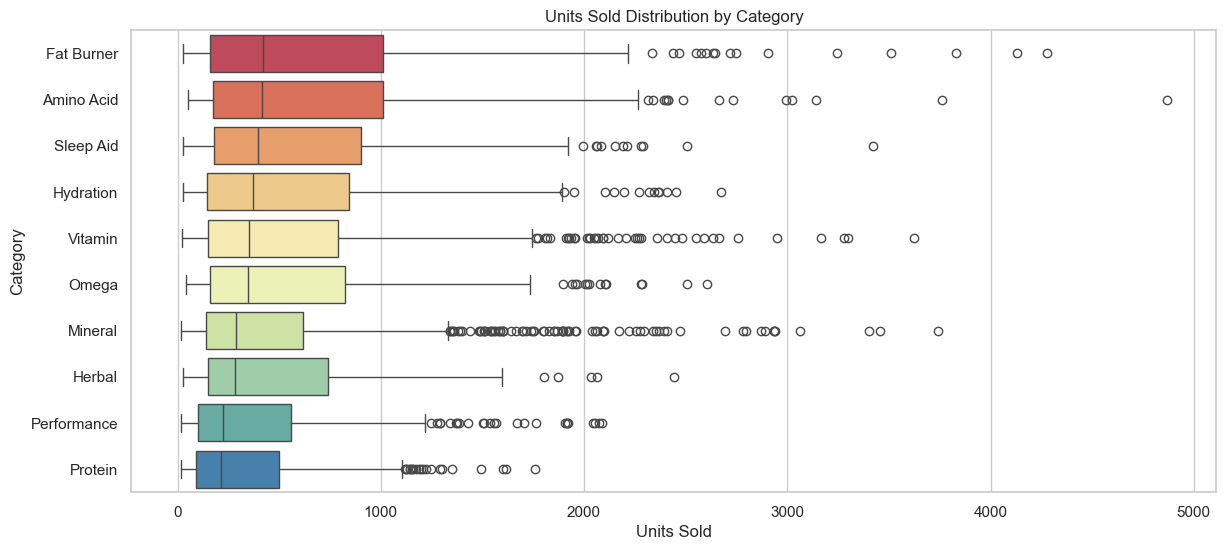

----------------------------------------------------------------------------------------------------------------------------------


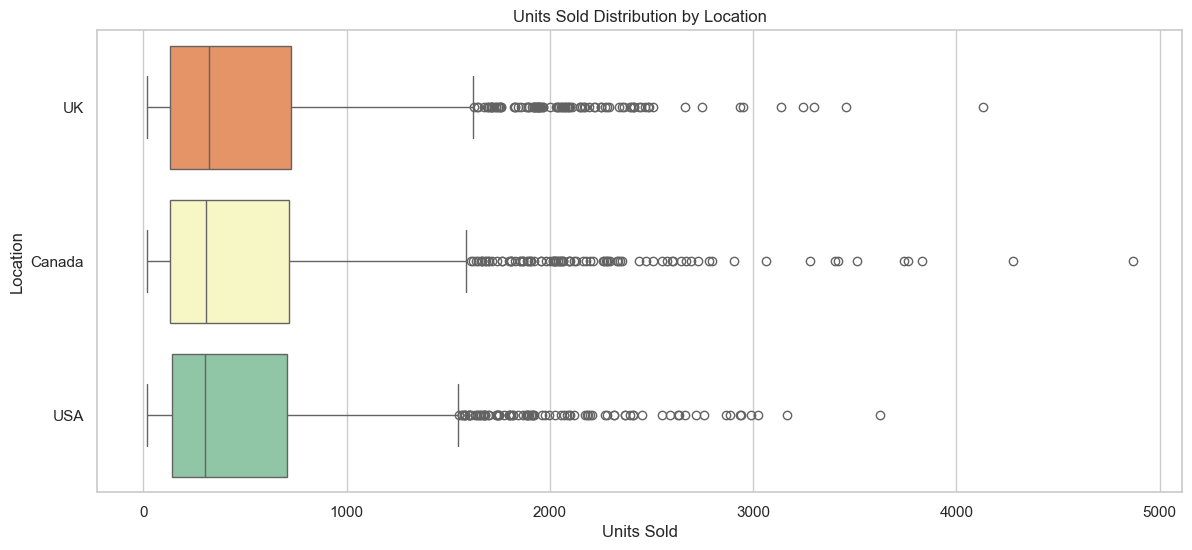

----------------------------------------------------------------------------------------------------------------------------------


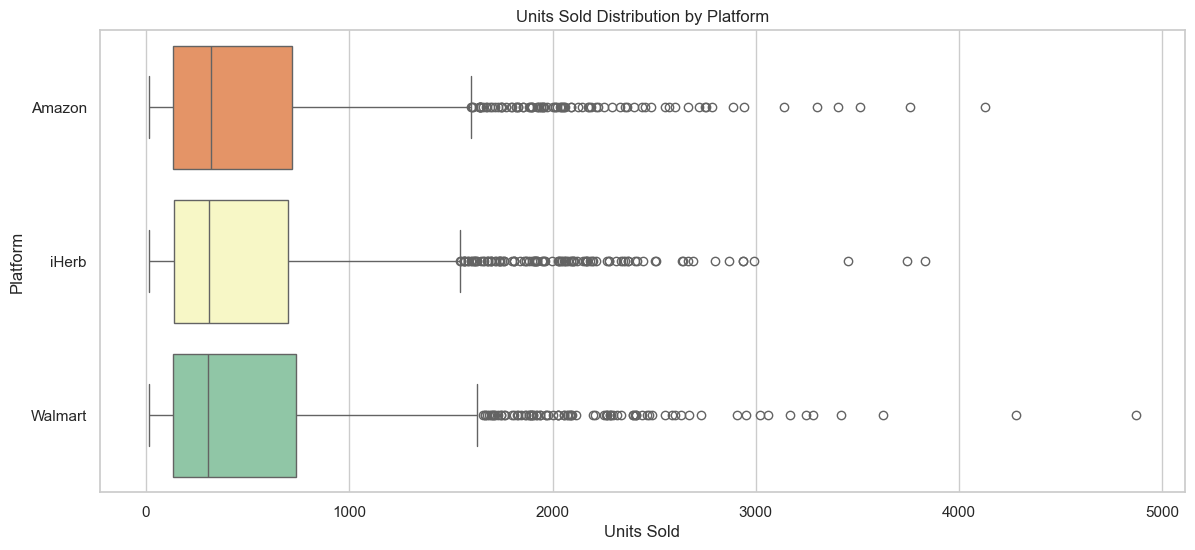

----------------------------------------------------------------------------------------------------------------------------------


In [31]:
# Categorical vs. Target (Units Sold)
print("\nAnalyzing relationships between categorical features and Revenue:")
categorical_features = ["Category", "Location", "Platform"]

for col in categorical_features:
    plt.figure(figsize=(14, 6))
    # Calculate the order based on median revenue to make the plot more informative
    order = df.groupby(col)["Units Sold"].median().sort_values(ascending=False).index
    sns.boxplot(y=col, x="Units Sold", data=df, order=order, palette="Spectral")
    plt.title(f"Units Sold Distribution by {col}")
    plt.xlabel("Units Sold")
    plt.ylabel(col)
    plt.show()
    print("-" * 130)

**PRACTICE OPPORTUNITY:** 
- **Examine the correlation heatmap generated above. Which numerical feature has the strongest positive correlation with `Units Sold` (excluding `Units Sold` itself)? Does this make sense?**
- **Which `Platform` (Amazon, Walmart, iHerb) appears to have the highest median `Units Sold` based on the box plots generated above?**
- **Generate a count plot specifically for the `Location` column. Which location has the most entries in the dataset?**

# TASK F: DATA PREPROCESSING FOR MACHINE LEARNING MODEL DEVELOPMENT

Before we can feed the data into our regression models, we need to prepare it further. Machine learning models typically require numerical input, and we need to split our data.

**Steps:**
1.  **Categorical Encoding:** Convert categorical columns (`Category`, `Location`, `Platform`) into numerical representations. We'll use **One-Hot Encoding**, which creates new binary (0 or 1) columns for each unique category value.
2.  **Feature Selection:** Choose the columns (features) we'll use to predict the target (`Units Sold`). We'll drop columns that are not useful or redundant (like the original categorical columns after encoding, 'Product Name'). We also separate our features (X) from our target variable (y).
3.  **Train-Test Split:** Divide the dataset into two parts: a **training set** (used to teach the model) and a **testing set** (used to evaluate the model's performance on unseen data). This prevents the model from simply memorizing the data it was trained on.

*(Note: We already handled missing values in the previous task. A more standard workflow often involves splitting the data *before* imputation to prevent data leakage from the test set into the training set during imputation fitting. However, for teaching simplicity, we imputed first.)*


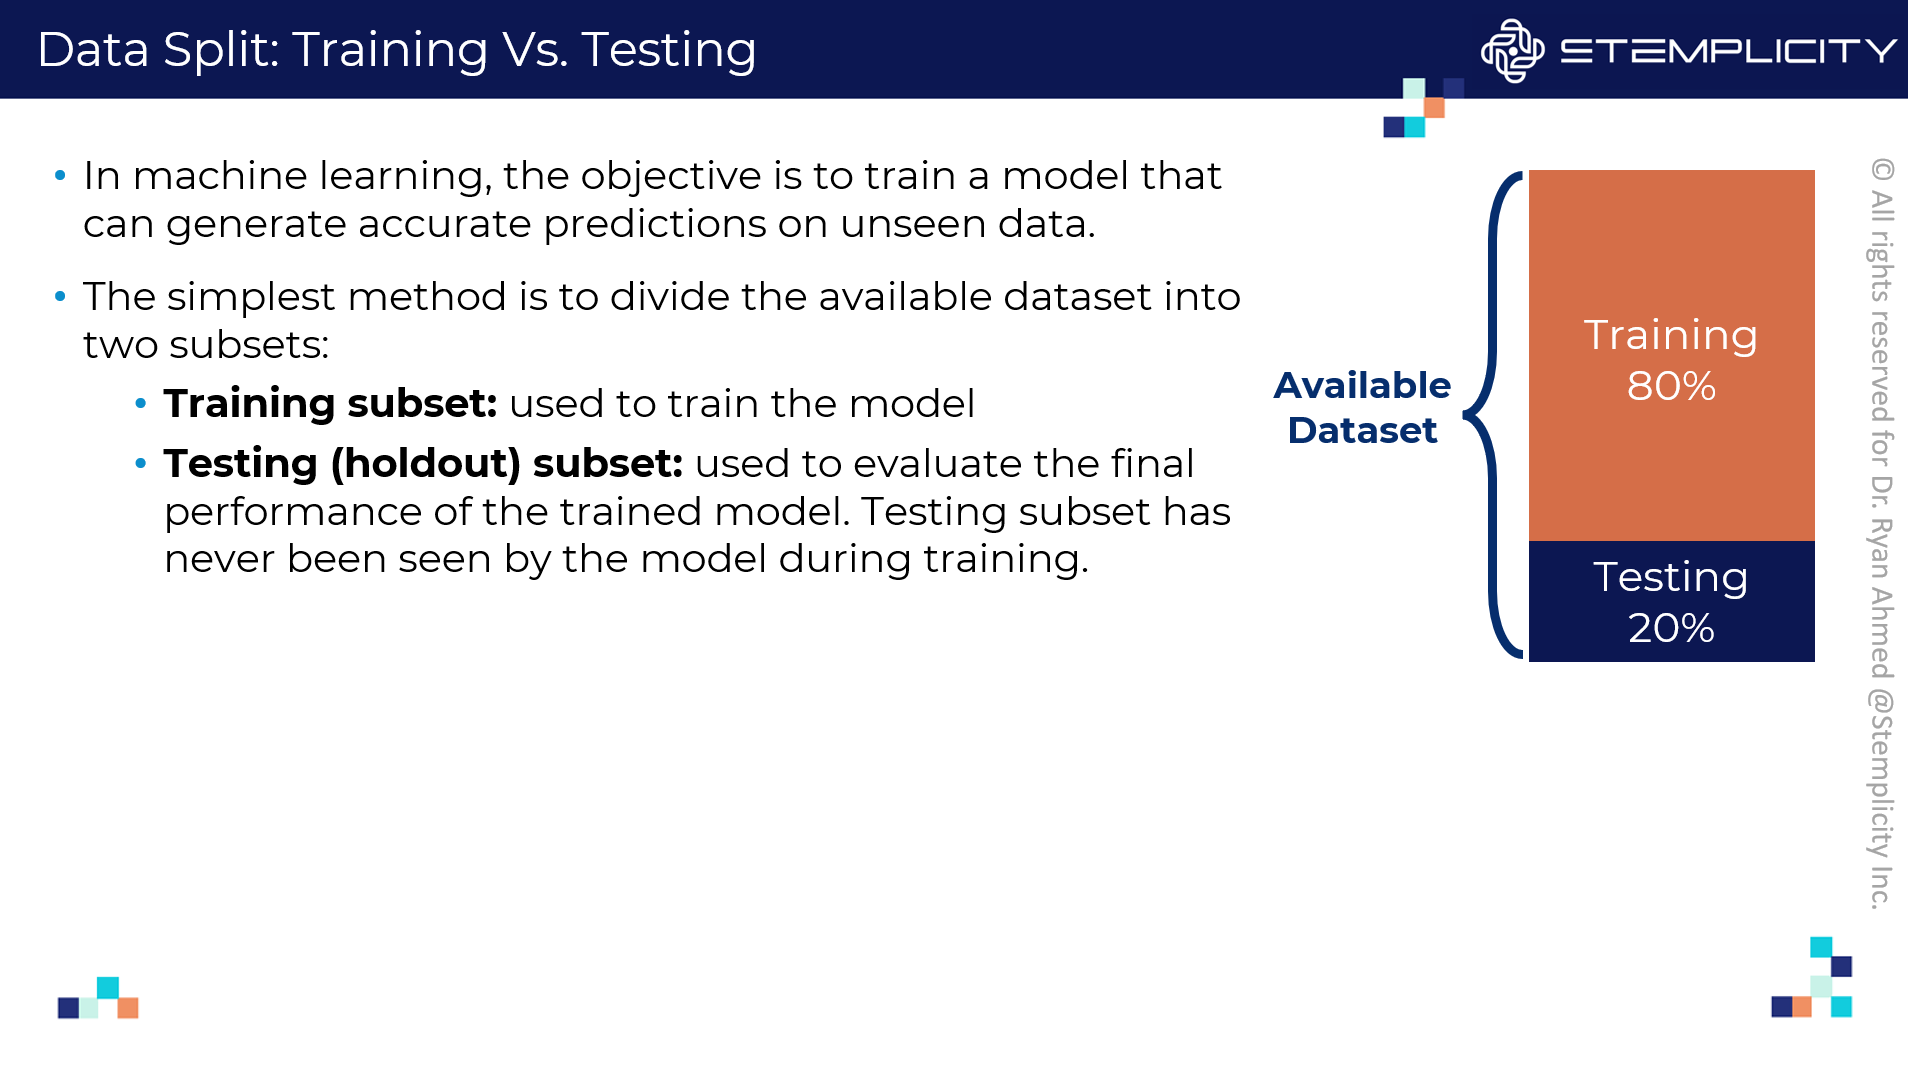

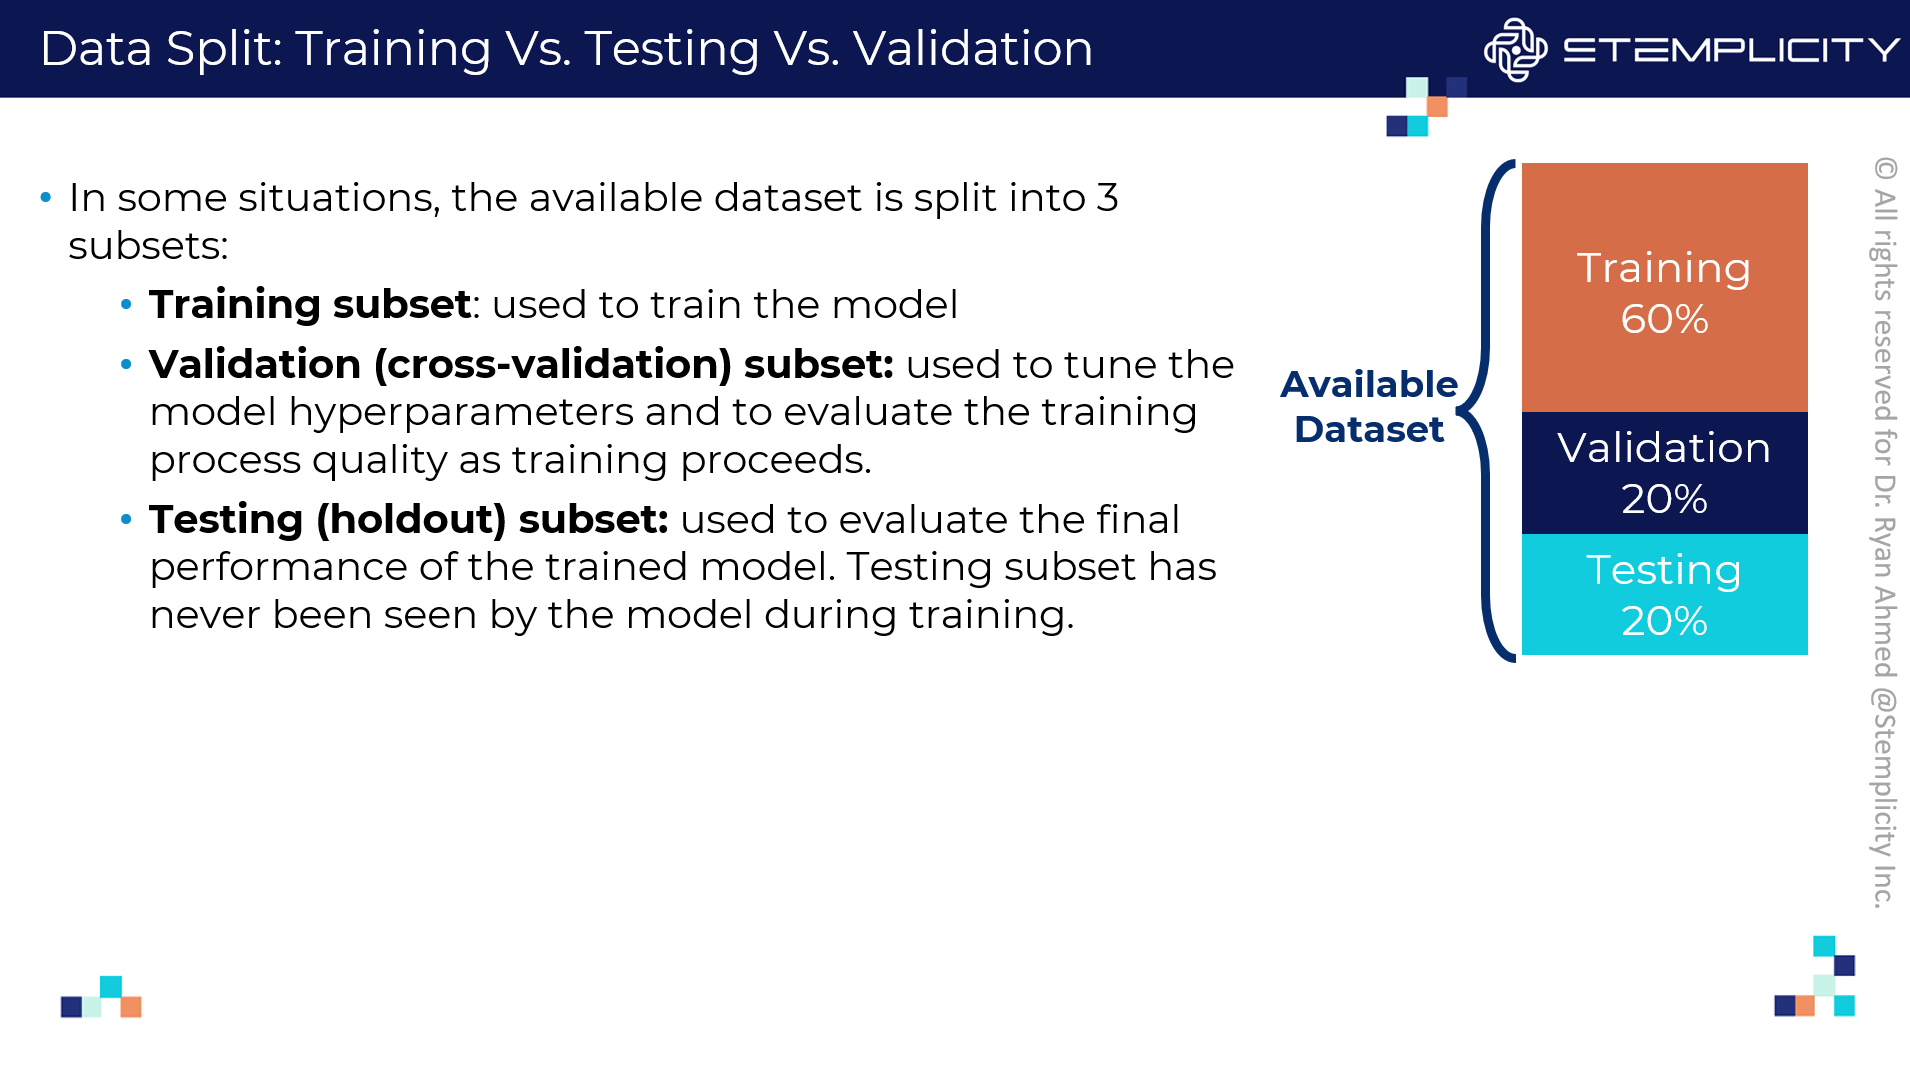

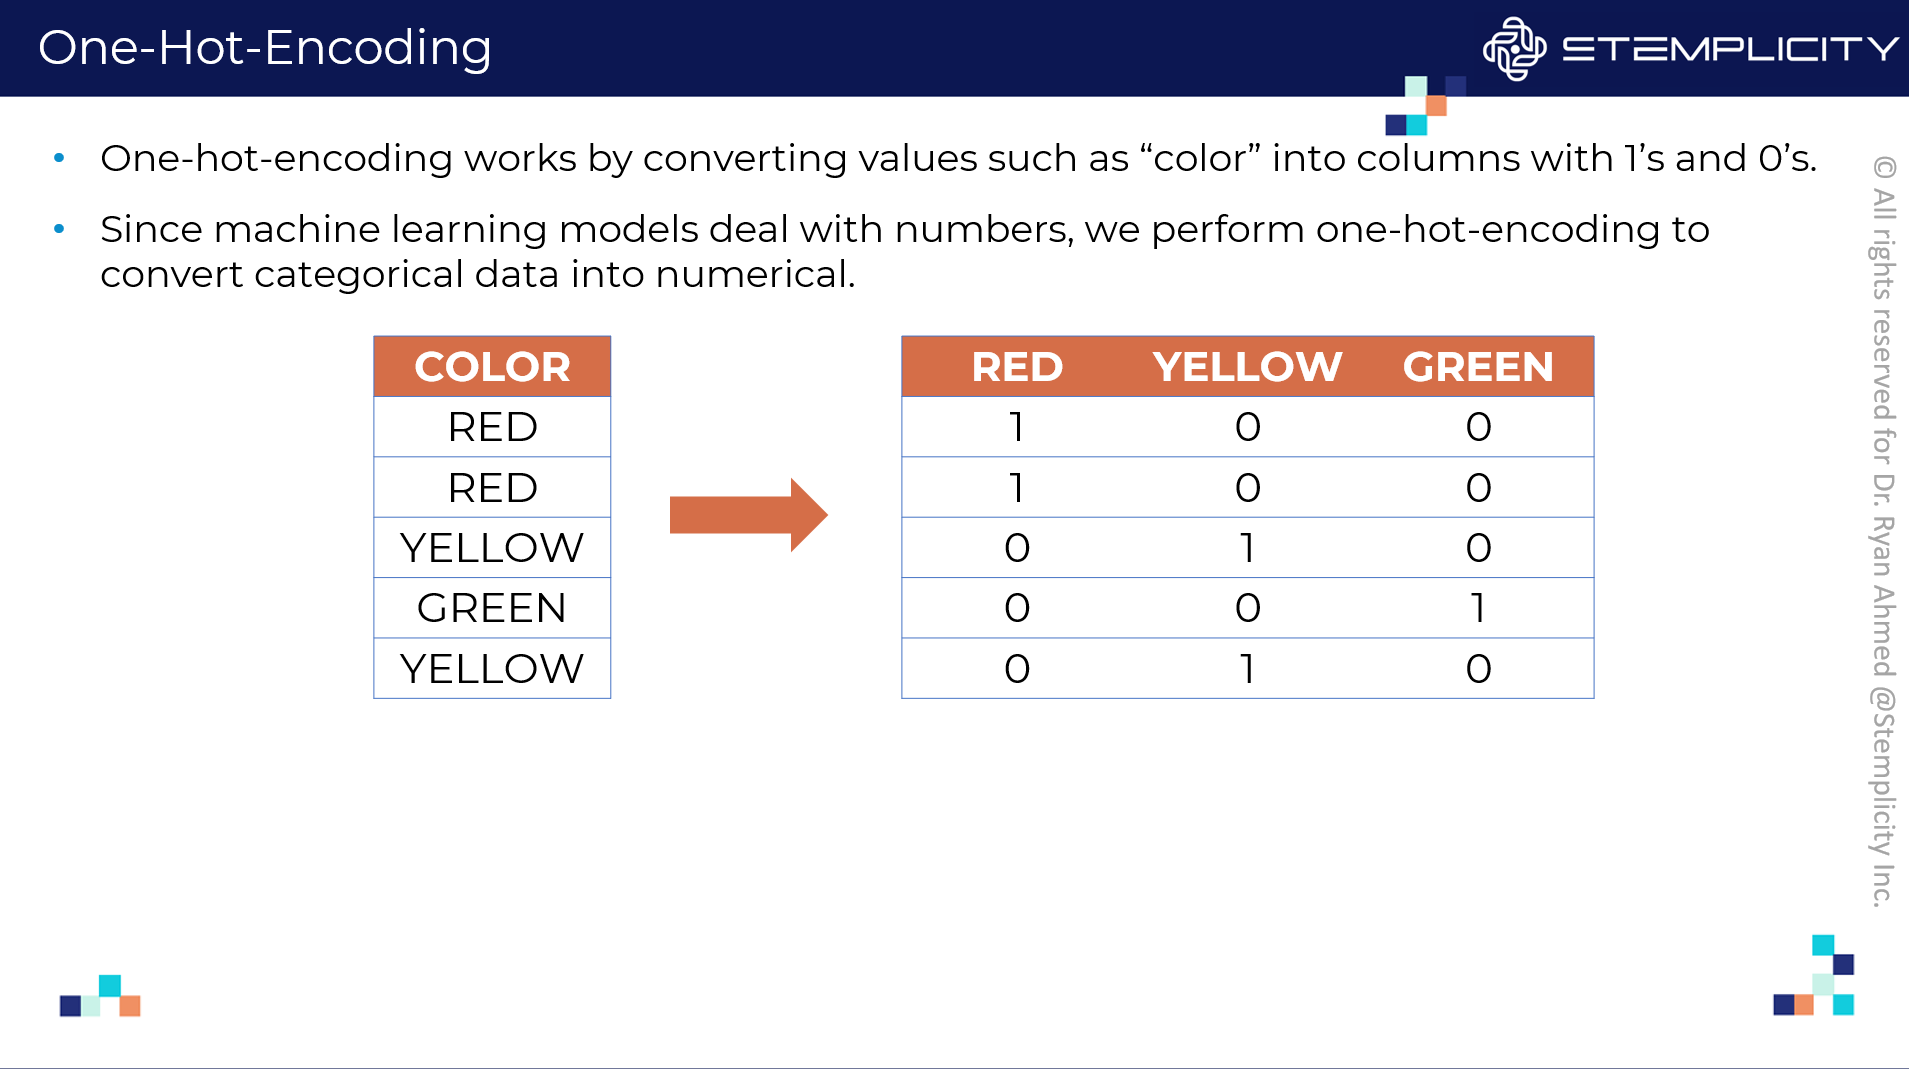

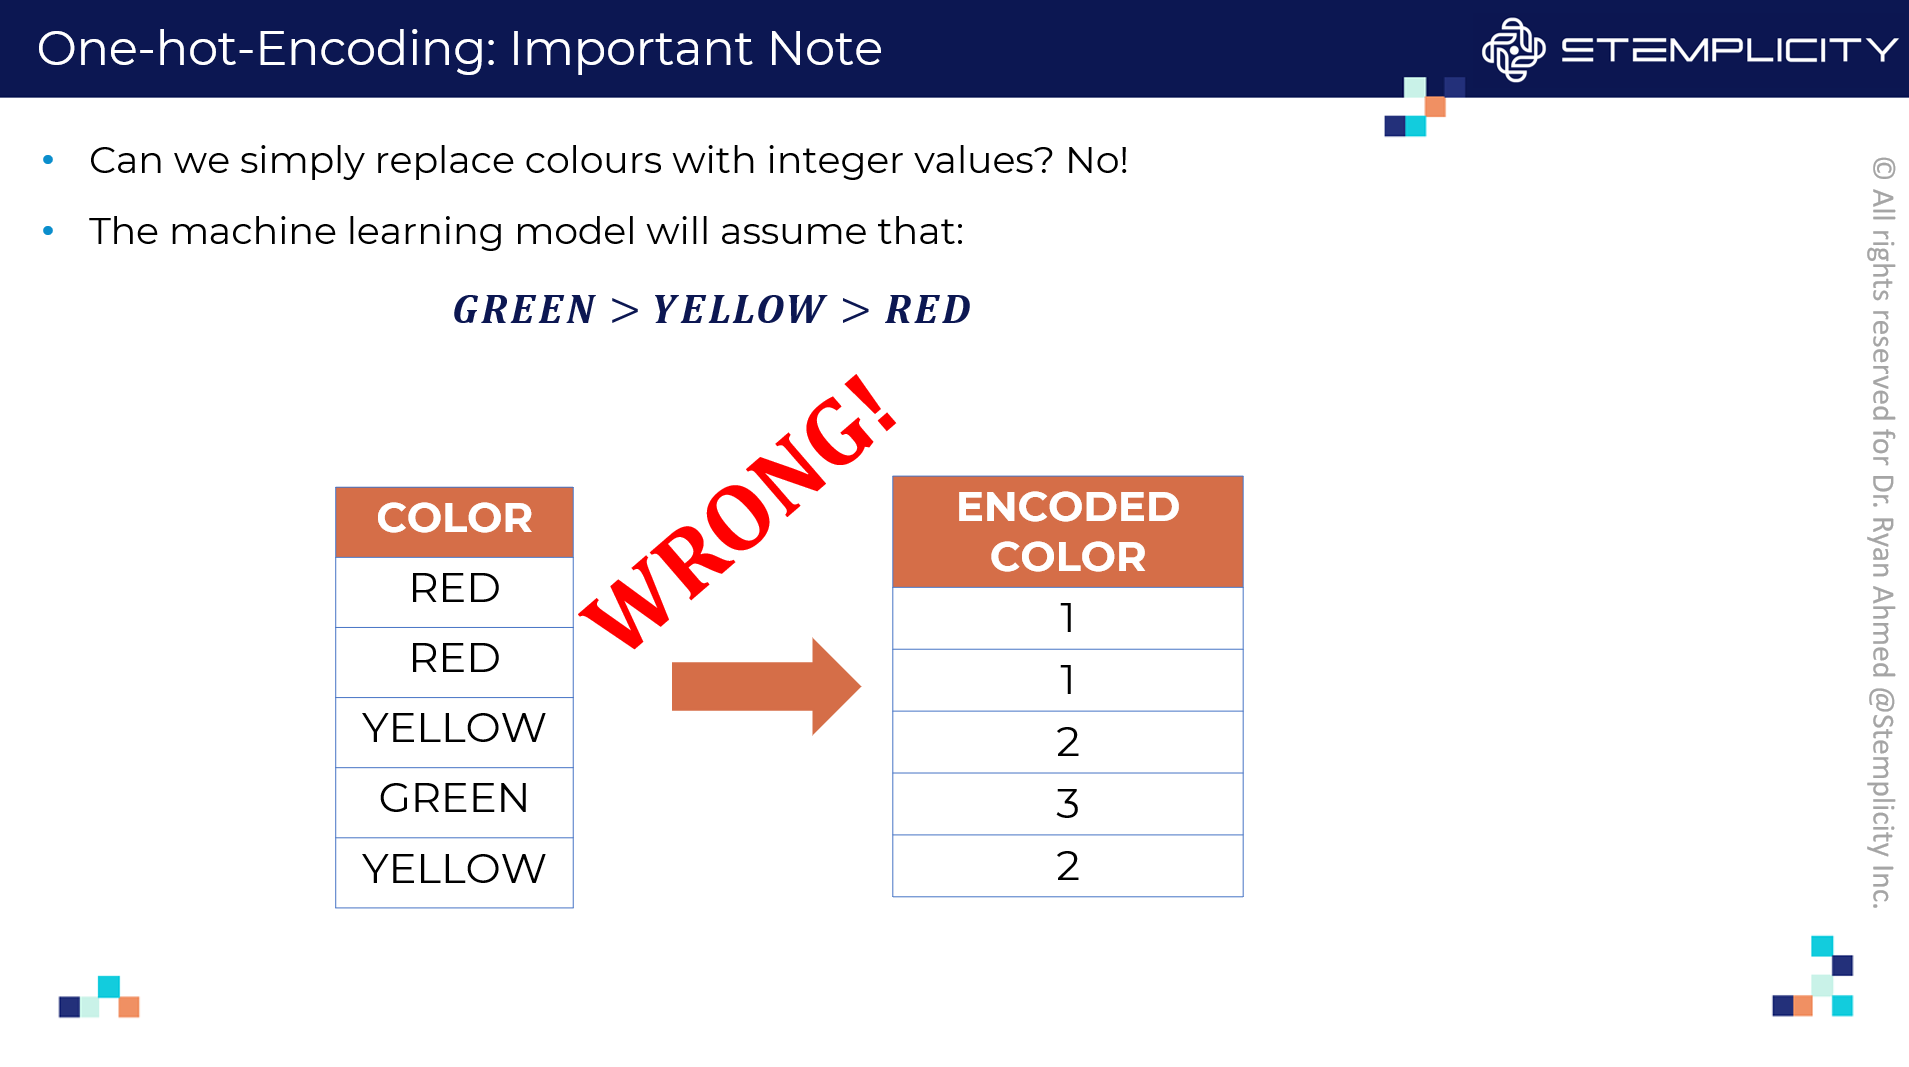

In [39]:
categorical_cols = ["Location"]
df_processed = df.copy()
df_processed = pd.get_dummies(df_processed, columns = categorical_cols, drop_first = True)  # drop_first=True helps avoid multicollinearity
df_processed

Date        Product Name     Category  Units Sold  Price  \
0     2020-01-06        Whey Protein      Protein         161  31.98   
1     2020-01-06           Vitamin C      Vitamin         135  42.51   
2     2020-01-06            Fish Oil        Omega        2604  12.91   
3     2020-01-06        Multivitamin      Vitamin         949  16.07   
4     2020-01-06         Pre-Workout  Performance         551  35.47   
...          ...                 ...          ...         ...    ...   
4379  2025-03-31           Melatonin    Sleep Aid         300  47.79   
4380  2025-03-31              Biotin      Vitamin         538  38.12   
4381  2025-03-31   Green Tea Extract   Fat Burner        1682  20.40   
4382  2025-03-31     Iron Supplement      Mineral        2093  18.31   
4383  2025-03-31  Electrolyte Powder    Hydration         606  39.12   

      Discount Platform  Location_UK  Location_USA  
0         0.03  Walmart        False         False  
1         0.04   Amazon         True         False  
2         0.25   Amazon        False         False  
3         0.08  Walmart        False         False  
4         0.25    iHerb        False         False  
...        ...      ...          ...           ...  
4379      0.21    iHerb        False          True  
4380      0.22  Walmart         True         False  
4381      0.12    iHerb        False          True  
4382      0.23   Amazon        False         False  
4383      0.23    iHerb         True         False  

[4384 rows x 9 columns]

In [ ]:
df_processed = pd.get_dummies(df_processed, columns = categorical_cols, drop_first = False)  # drop_first=True helps avoid multicollinearity


In [40]:
# 1. Categorical Encoding (One-Hot Encoding)
print("\nPerforming One-Hot Encoding on categorical features...")
categorical_cols = ["Category", "Location", "Platform"]

# Make a copy to avoid modifying the original df used in EDA plots if needed later
df_processed = df.copy()
df_processed = pd.get_dummies(df_processed, columns = categorical_cols, drop_first = True)  # drop_first=True helps avoid multicollinearity
# Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. 
# This means that one predictor can be linearly predicted from the others with a high degree of accuracy. 
# It becomes a problem because it undermines the statistical significance of individual predictor variables.

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_processed.shape)
print("Columns added:", list(set(df_processed.columns) - set(df.columns)))

# Display head of encoded dataframe
print("\nFirst 5 rows of the encoded dataset:")
display(df_processed.head())


Performing One-Hot Encoding on categorical features...
Shape before encoding: (4384, 8)
Shape after encoding: (4384, 18)
Columns added: ['Category_Mineral', 'Category_Hydration', 'Platform_Walmart', 'Category_Fat Burner', 'Category_Protein', 'Category_Performance', 'Category_Sleep Aid', 'Location_UK', 'Category_Omega', 'Location_USA', 'Platform_iHerb', 'Category_Herbal', 'Category_Vitamin']

First 5 rows of the encoded dataset:


Date  Product Name  Units Sold  Price  Discount  Category_Fat Burner  \
0  2020-01-06  Whey Protein         161  31.98      0.03                False   
1  2020-01-06     Vitamin C         135  42.51      0.04                False   
2  2020-01-06      Fish Oil        2604  12.91      0.25                False   
3  2020-01-06  Multivitamin         949  16.07      0.08                False   
4  2020-01-06   Pre-Workout         551  35.47      0.25                False   

   Category_Herbal  Category_Hydration  Category_Mineral  Category_Omega  \
0            False               False             False           False   
1            False               False             False           False   
2            False               False             False            True   
3            False               False             False           False   
4            False               False             False           False   

   Category_Performance  Category_Protein  Category_Sleep Aid  \
0                 False              True               False   
1                 False             False               False   
2                 False             False               False   
3                 False             False               False   
4                  True             False               False   

   Category_Vitamin  Location_UK  Location_USA  Platform_Walmart  \
0             False        False         False              True   
1              True         True         False             False   
2             False        False         False             False   
3              True        False         False              True   
4             False        False         False             False   

   Platform_iHerb  
0           False  
1           False  
2           False  
3           False  
4            True

In [41]:
# 2. Feature Selection (Define X and y)

print("\nSelecting features (X) and target (y)...")

# Target variable
y = df_processed["Units Sold"]

# Features: Drop the original target, 'Product Name' (too specific),  'Date',  'Units Sold', as they might not be useful for prediction
columns_to_drop = [ "Product Name", "Date", "Units Sold"]

X = df_processed.drop(columns = columns_to_drop)

print("Target variable 'y' shape:", y.shape)
print("Features 'X' shape:", X.shape)
print("\nFeatures being used for modeling:")
print(X.columns.tolist())


Selecting features (X) and target (y)...
Target variable 'y' shape: (4384,)
Features 'X' shape: (4384, 15)

Features being used for modeling:
['Price', 'Discount', 'Category_Fat Burner', 'Category_Herbal', 'Category_Hydration', 'Category_Mineral', 'Category_Omega', 'Category_Performance', 'Category_Protein', 'Category_Sleep Aid', 'Category_Vitamin', 'Location_UK', 'Location_USA', 'Platform_Walmart', 'Platform_iHerb']


In [42]:
# 3. Train-Test Split

print("\nSplitting data into training and testing sets...")
# test_size = 0.2 means 20% of the data is for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


Splitting data into training and testing sets...
Training set shape (X_train): (3507, 15)
Testing set shape (X_test): (877, 15)
Training target shape (y_train): (3507,)
Testing target shape (y_test): (877,)


**PRACTICE OPPORTUNITY:**
- **Enable data shuffling and split the data into 30% for testing and 70% for training? display the dataframe, what do you conclude?**
- **Verify the number of rows in `X_train` and `X_test`. Do they add up to the total number of rows in the original dataset (`df.shape[0]`)?**


# TASK G: BUILD A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

Now we'll build our first regression model: **Linear Regression**.

**Concept:** Linear Regression tries to find the best-fitting straight line (or hyperplane in higher dimensions) through the data points. It assumes a linear relationship between the input features (X) and the target variable (y). The model learns coefficients (weights) for each feature, indicating how much a one-unit change in that feature affects the target variable, plus an intercept term.

`y = b0 + b1*x1 + b2*x2 + ... + bn*xn`

Where:
*   `y` is the predicted target (Revenue)
*   `b0` is the intercept
*   `b1`, `b2`, ..., `bn` are the coefficients for features `x1`, `x2`, ..., `xn`

**Steps:**

1.  **Initialize:** Create an instance of the `LinearRegression` model from scikit-learn.
2.  **Train:** Fit the model to the **training data** (`X_train`, `y_train`). The model learns the optimal coefficients during this step.
3.  **Predict:** Use the trained model to make predictions on the **testing data** (`X_test`). We use the test set because we want to see how well the model generalizes to new, unseen data.
4.  **Evaluate:** Compare the model's predictions (`y_pred`) against the actual values (`y_test`) using regression metrics.


In [49]:
# Check if training/testing data is available
print("Building and evaluating Linear Regression model...")

# 1. Initialize the Linear Regression model
linear_model = LinearRegression()

# 2. Train the model
print("Training the Linear Regression model...")
linear_model.fit(X_train, y_train)
print("Model training complete.")

# 3. Make predictions on the test set
print("Making predictions on the test set...")
y_pred_linear = linear_model.predict(X_test)

# 4. Evaluate the model
print("\nEvaluating Linear Regression Model:")
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Calculate Root Mean Squared Error
r2_linear = r2_score(y_test, y_pred_linear)

print(f"  Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"  Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"  R-squared (R²): {r2_linear:.4f}")



Building and evaluating Linear Regression model...
Training the Linear Regression model...
Model training complete.
Making predictions on the test set...

Evaluating Linear Regression Model:
  Mean Absolute Error (MAE): 227.37
  Mean Squared Error (MSE): 102318.62
  Root Mean Squared Error (RMSE): 319.87
  R-squared (R²): 0.6773


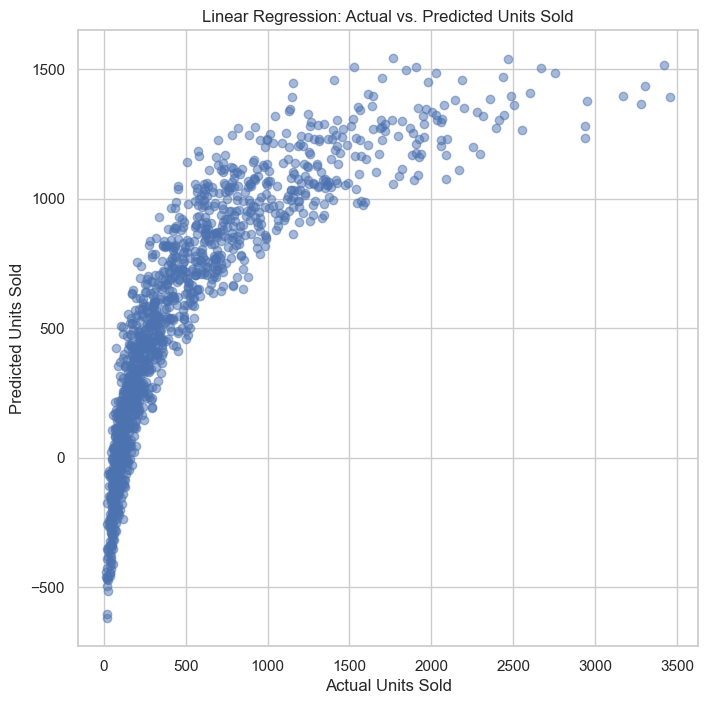

In [50]:
# Let's visualize predictions Vs. actual
plt.figure(figsize = (8, 8))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Linear Regression: Actual vs. Predicted Units Sold")

plt.grid(True)
plt.show()


**Interpreting the Metrics:**

*   **MAE (Mean Absolute Error):** The average absolute difference between the predicted and actual values. An MAE of 500 means, on average, the prediction was off by 500 "dollars" or "units sold". Lower is better.
*   **MSE (Mean Squared Error):** Similar to MAE but squares the errors before averaging. This penalizes larger errors more heavily. Lower is better. Units are squared (e.g., dollars or units sold squared), making RMSE often more interpretable.
*   **RMSE (Root Mean Squared Error):** The square root of MSE. It's in the same units as the target variable (Revenue or units sold in our case), making it easier to understand the typical error magnitude. Lower is better.
*   **R-squared (R²):** Represents the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1 (or can be negative for very poor models). An R² of 0.85 means that 85% of the variability in "Revenue" or "units sold" can be explained by our model's features. Higher is generally better (closer to 1).

**PRACTICE OPPORTUNITY:**
- **Based on the R-squared (R²) value calculated above for the Linear Regression model, would you say the model provides a good fit for explaining the variance in `Units Sold`? Why or why not? (e.g., Is R² closer to 1 or 0?)**
- **What does the RMSE value tell you about the typical prediction error of the linear model in terms of dollars or units sold?**

# TASK H: BUILD A RANDOM FOREST REGRESSION MODEL

Linear Regression assumes a straight-line relationship. What if the relationship between features and revenue is more complex or non-linear? Let's try a more powerful model: **Random Forest Regression**.

**Concept:** Random Forest is an **ensemble** method. It builds multiple individual decision trees during training. Each tree is trained on a random subset of the data and considers only a random subset of features at each split point. To make a prediction, the Random Forest averages the predictions from all the individual trees. This approach generally leads to:
*   **Higher accuracy:** Can capture complex, non-linear patterns.
*   **Robustness:** Less prone to overfitting compared to a single deep decision tree because errors from individual trees tend to average out.
*   **Feature Importance:** Can provide estimates of how important each feature was in making predictions.

**Steps:** (Similar to Linear Regression)

1.  **Initialize:** Create an instance of the `RandomForestRegressor`. We can specify parameters like `n_estimators` (number of trees) and `random_state` (for reproducibility). We can also add other parameters like `max_depth` to control tree complexity.
2.  **Train:** Fit the model to the **training data** (`X_train`, `y_train`).
3.  **Predict:** Use the trained model to make predictions on the **testing data** (`X_test`).
4.  **Evaluate:** Compare the predictions (`y_pred_rf`) against the actual values (`y_test`) using the same regression metrics (MAE, MSE, RMSE, R²).
5.  **Compare:** How does the Random Forest performance compare to the Linear Regression model?


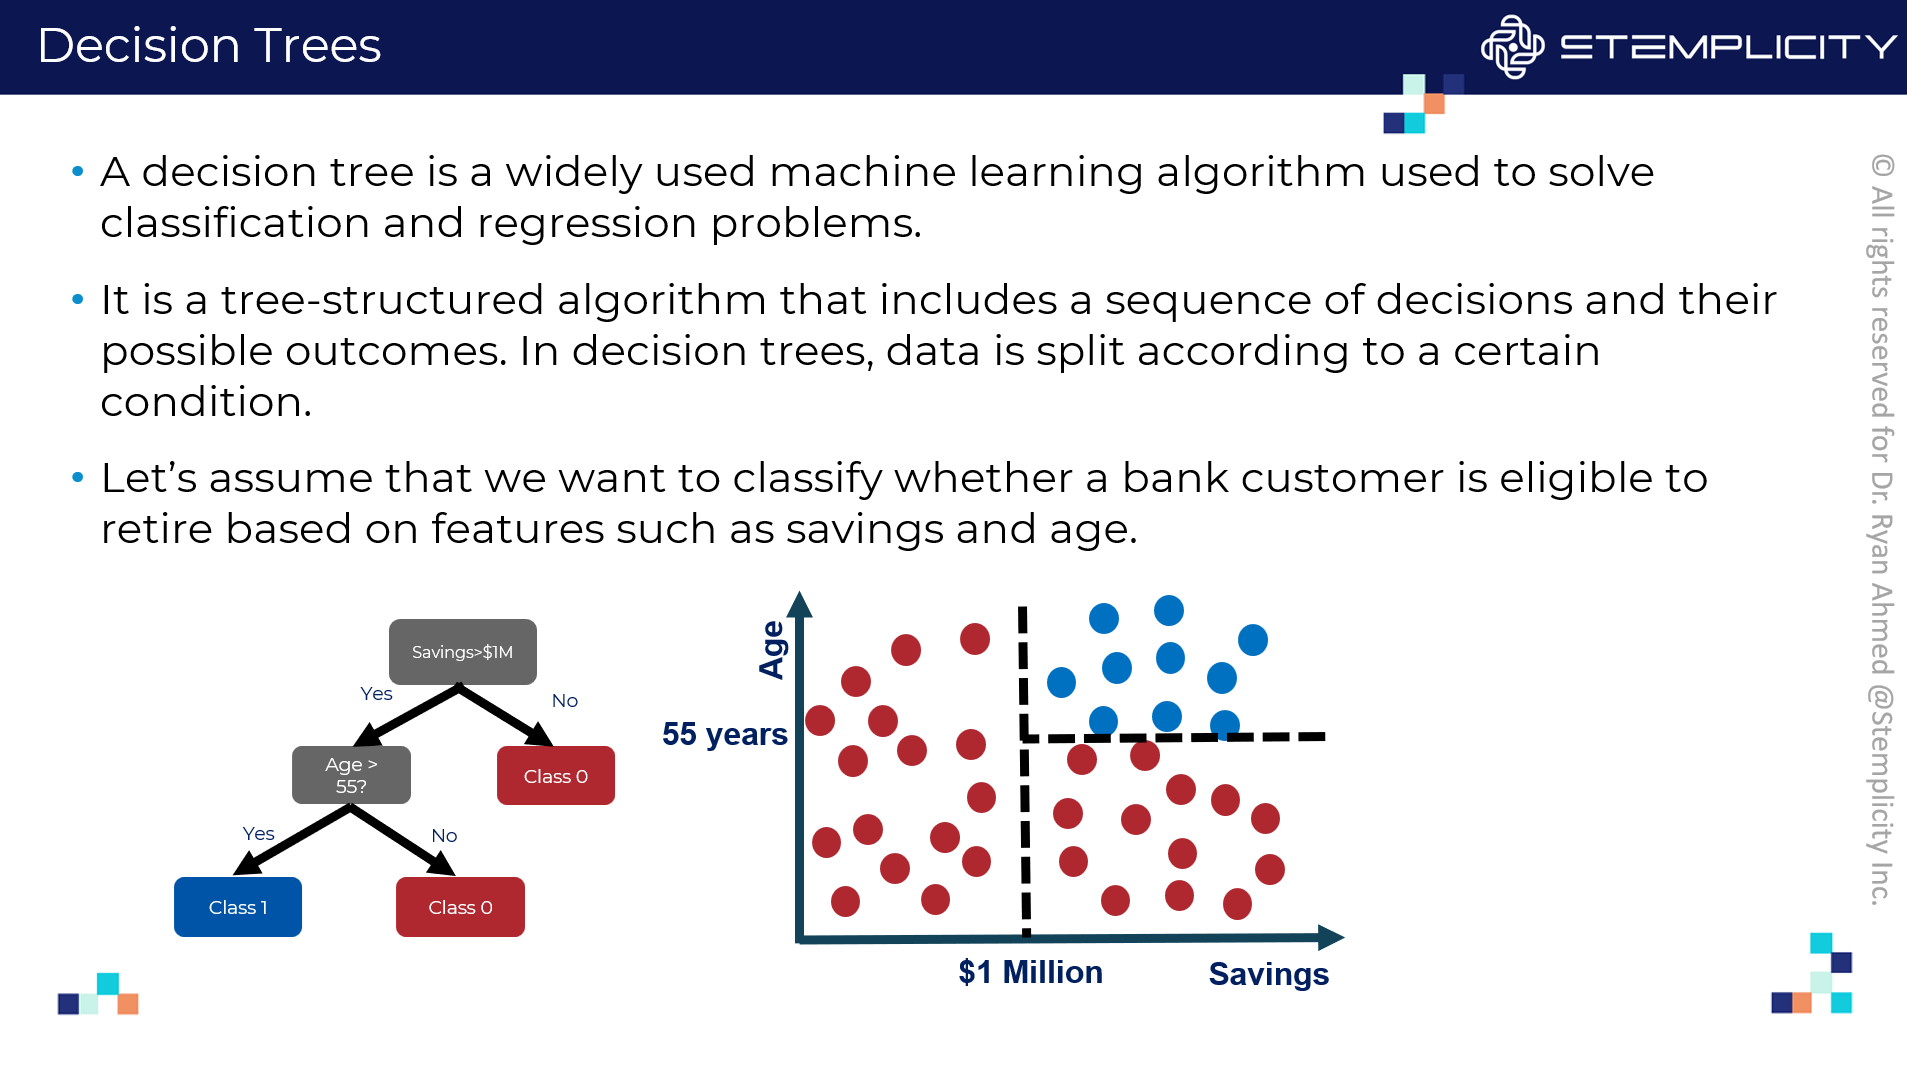

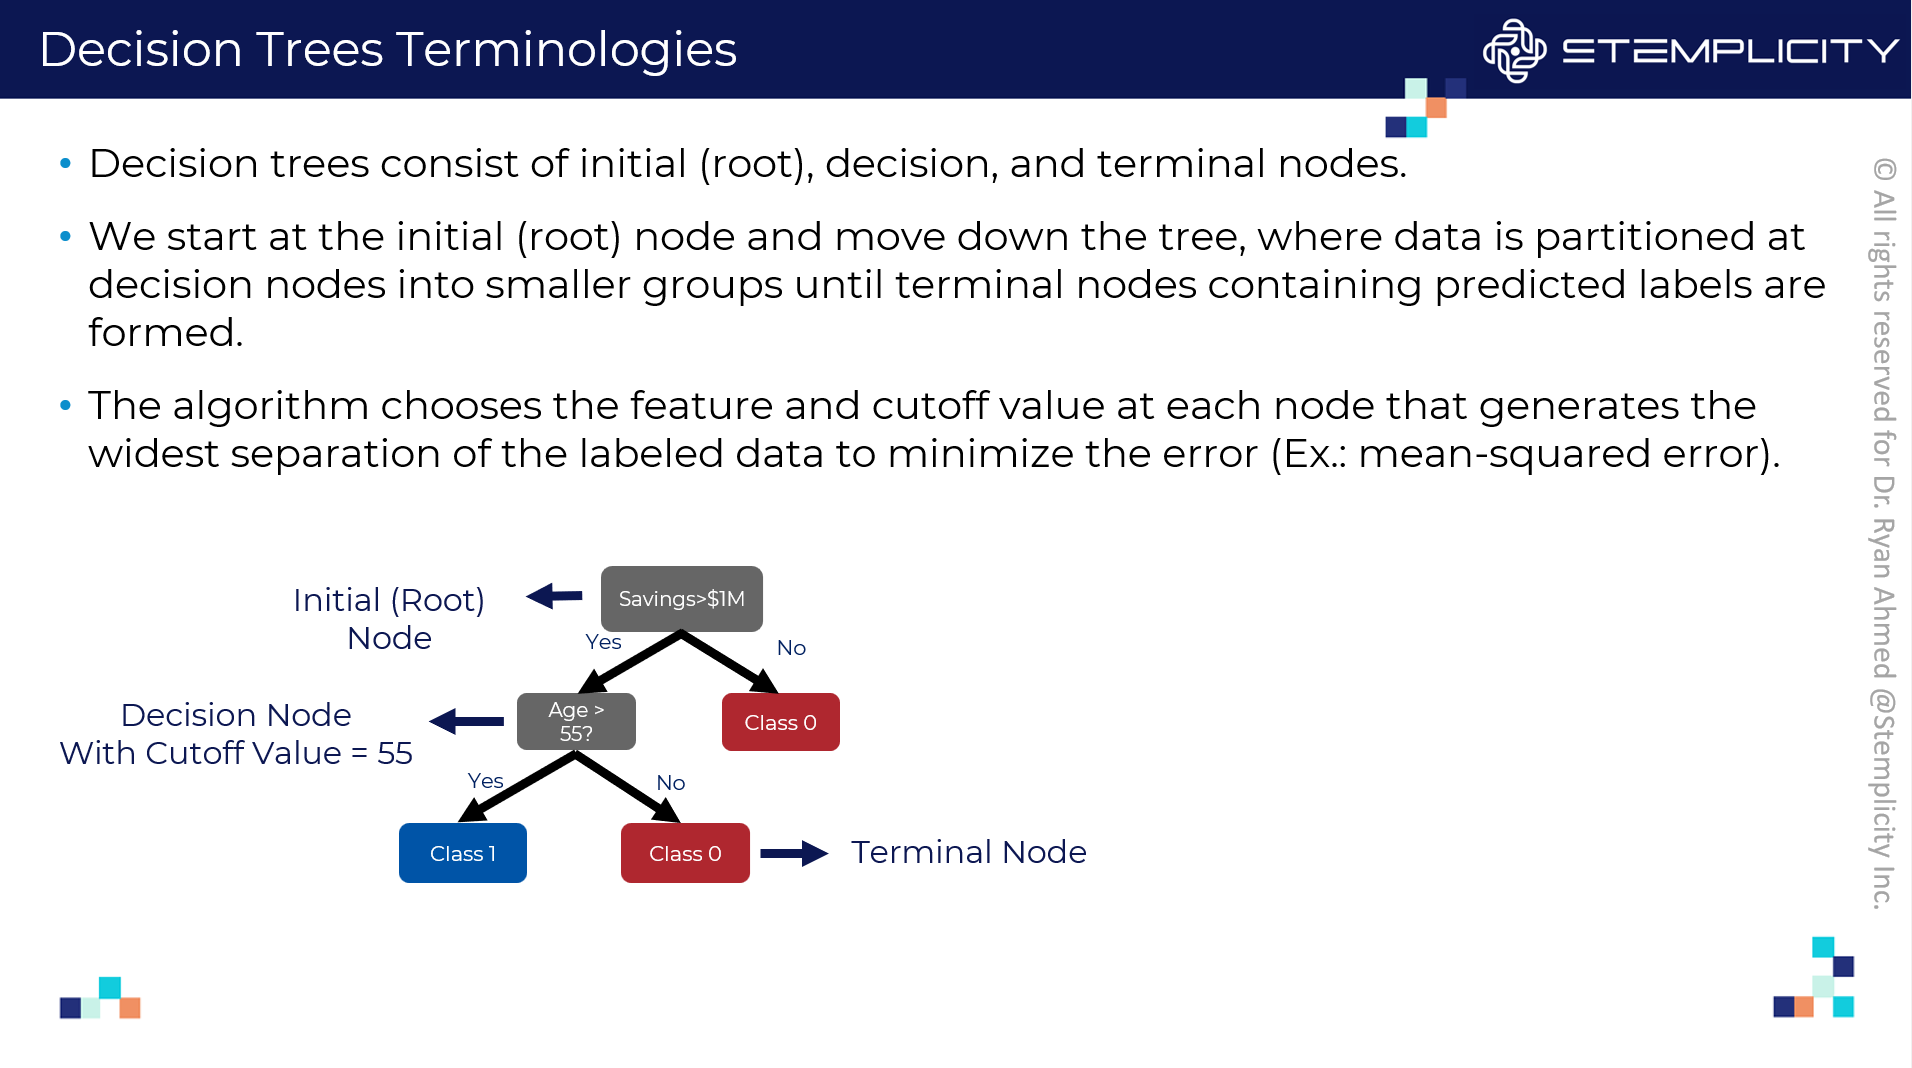

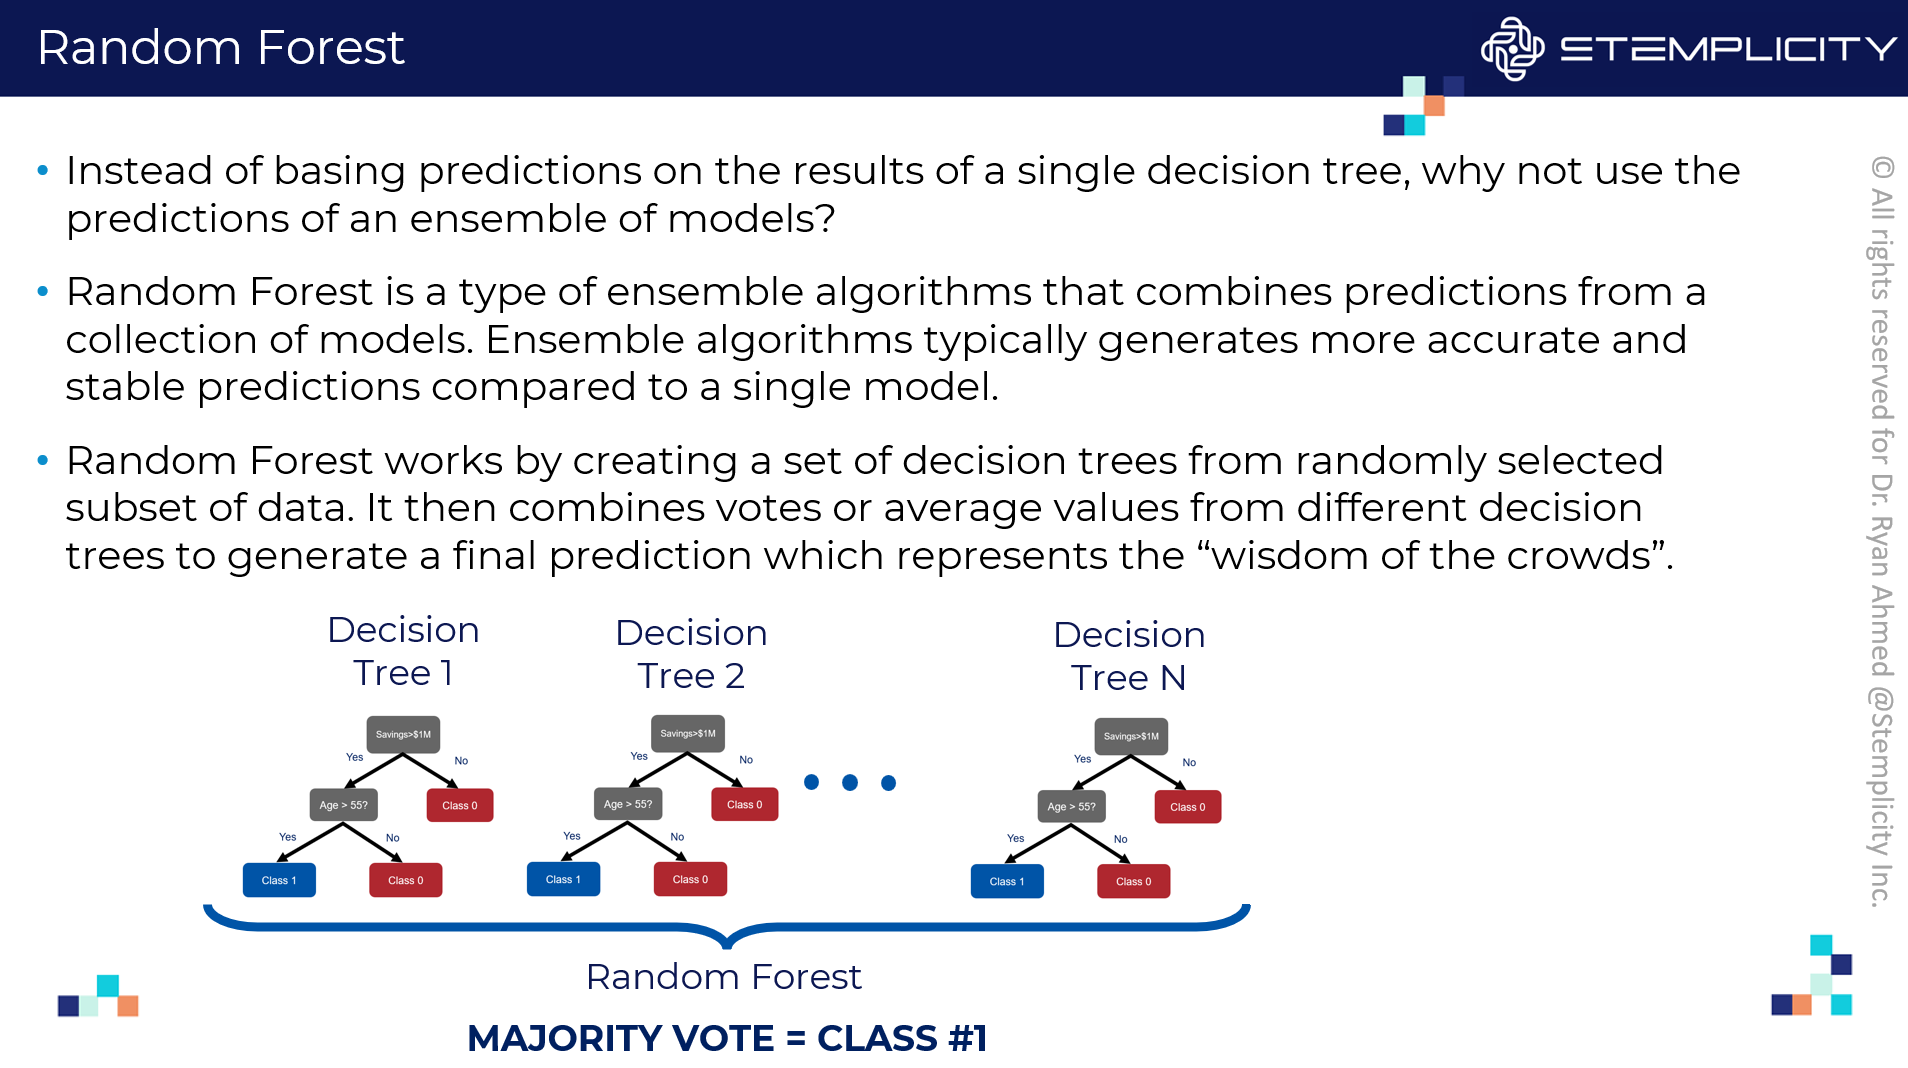

In [52]:
print("Building and evaluating Random Forest Regressor model...")

# 1. Initialize the Random Forest Regressor model
# n_estimators: number of trees in the forest
# random_state: ensures reproducibility
# max_depth, min_samples_split: control tree complexity to prevent overfitting
rf_model = RandomForestRegressor(random_state = 42)  # Use out-of-bag samples for validation estimate

# Note: Hyperparameters like n_estimators, max_depth etc. can be tuned for better performance
# 2. Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training complete.")

Building and evaluating Random Forest Regressor model...
Training the Random Forest model...
Model training complete.


In [53]:
# 3. Make predictions on the test set
print("Making predictions on the test set...")
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the model
print("\nEvaluating Random Forest Model:")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R²): {r2_rf:.4f}")

Making predictions on the test set...

Evaluating Random Forest Model:
  Mean Absolute Error (MAE): 142.57
  Mean Squared Error (MSE): 60458.79
  Root Mean Squared Error (RMSE): 245.88
  R-squared (R²): 0.8093


In [54]:
# 5. Compare with Linear Regression
print("\n--- Comparison ---")
print(f"Linear Regression R²: {r2_linear:.4f}")
print(f"Random Forest R²:     {r2_rf:.4f} (Test Set)")

print(f"\nLinear Regression RMSE: {rmse_linear:.2f}")
print(f"Random Forest RMSE:     {rmse_rf:.2f}")

if r2_rf > r2_linear:
    print("\nRandom Forest performed better on Test Set (higher R²).")
elif r2_rf < r2_linear:
    print("\nLinear Regression performed better on Test Set (higher R²).")
else:
    print("\nBoth models performed similarly on Test Set based on R².")



--- Comparison ---
Linear Regression R²: 0.6773
Random Forest R²:     0.8093 (Test Set)

Linear Regression RMSE: 319.87
Random Forest RMSE:     245.88

Random Forest performed better on Test Set (higher R²).


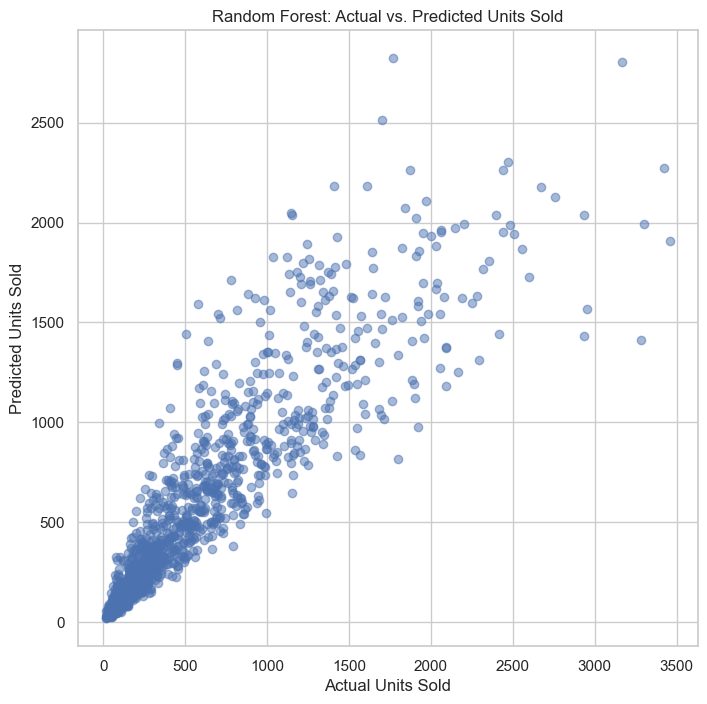

In [55]:
# Visualize predictions vs actual for Random Forest
plt.figure(figsize = (8, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Random Forest: Actual vs. Predicted Units Sold")
plt.grid(True)
plt.show()

**PRACTICE OPPORTUNITY:**
- **XG-Boost is a powerful algorithm that can solve both regression and classification-type problems. Train an XG-boost algorithm to predict units sold.**
- **Compare the performance of XG-Boost to linear regression and Random Forest algorithms**
- *Note: you will need to install xgboost and conduct external research*

# TASK I: FEATURE IMPORTANCE ANALYSIS

Now that we've built our models, let's analyze which features are most important for predicting units sold. Understanding feature importance helps us:

1. Gain business insights about what drives revenue
2. Identify potential areas for feature engineering
3. Consider feature selection for model simplification

Random Forest models provide a built-in method to calculate feature importance based on how much each feature contributes to decreasing impurity across all trees.


Calculating and plotting feature importances from Random Forest...

Top 10 Most Important Features:


Price                   0.770222
Discount                0.111468
Category_Protein        0.025967
Category_Fat Burner     0.017321
Category_Performance    0.016727
Category_Mineral        0.011656
Location_UK             0.008555
Location_USA            0.007008
Platform_iHerb          0.006727
Category_Vitamin        0.006704
dtype: float64

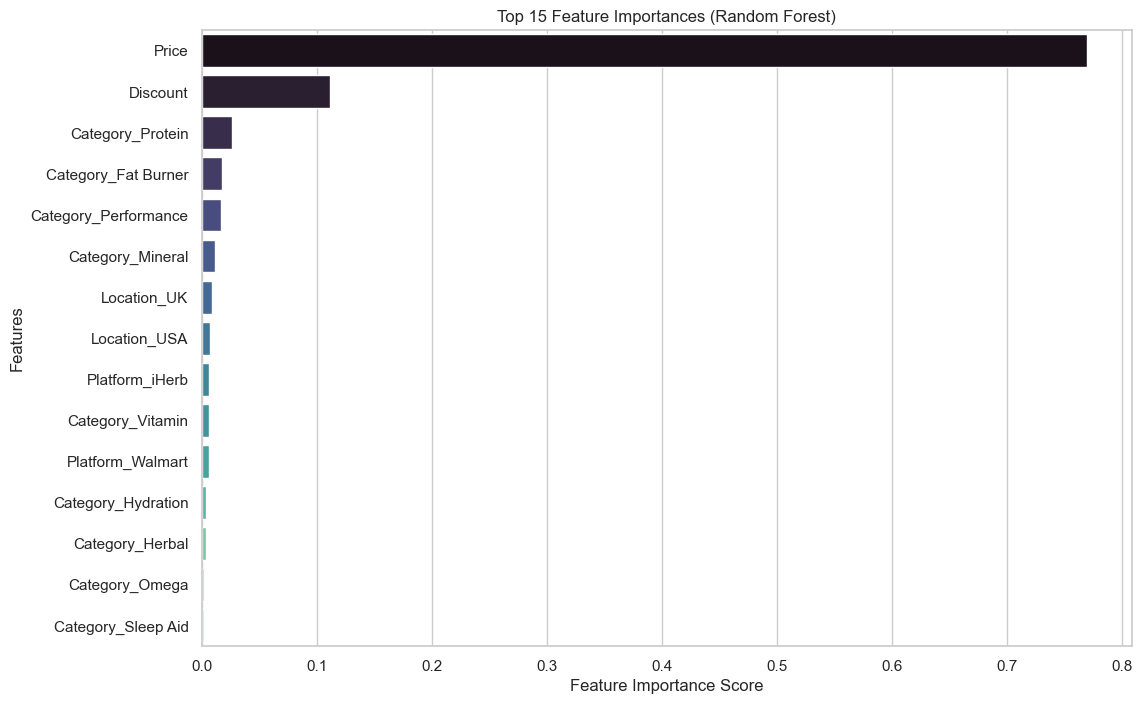

In [61]:
# Calculate and visualize feature importances from Random Forest

print("Calculating and plotting feature importances from Random Forest...")

# 1. Access feature importances
importances = rf_model.feature_importances_

# 2. Create a pandas Series with feature names
feature_names = X_train.columns
feature_importance_series = pd.Series(importances, index = feature_names)

# 3. Sort and plot
sorted_importances = feature_importance_series.sort_values(ascending = False)

print("\nTop 10 Most Important Features:")
display(sorted_importances.head(10))  # Use display for better formatting

plt.figure(figsize = (12, 8))
# Plotting only the top 20 for clarity if there are many features
num_features_to_plot = min(20, len(sorted_importances))
sns.barplot(
    x = sorted_importances.head(num_features_to_plot),
    y = sorted_importances.head(num_features_to_plot).index,
    palette = "mako",
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(f"Top {num_features_to_plot} Feature Importances (Random Forest)")
plt.show()


**PRACTICE OPPORTUNITY:**
- **Split the data into 75% for training and 25% for testing. Re-train a Linear Regression, Random Forest, and XG-Boost Models and compare their performance. What do you conclude?**
- **Did the performance change with different test splits?**

# PRACTICE OPPORTUNITIES SOLUTION

**PRACTICE OPPORTUNITY SOLUTION:**
- **Plot the graphs of the following linear equations:**
    - 𝑦=3∗𝑥
    - 𝑦=15−10∗𝑥

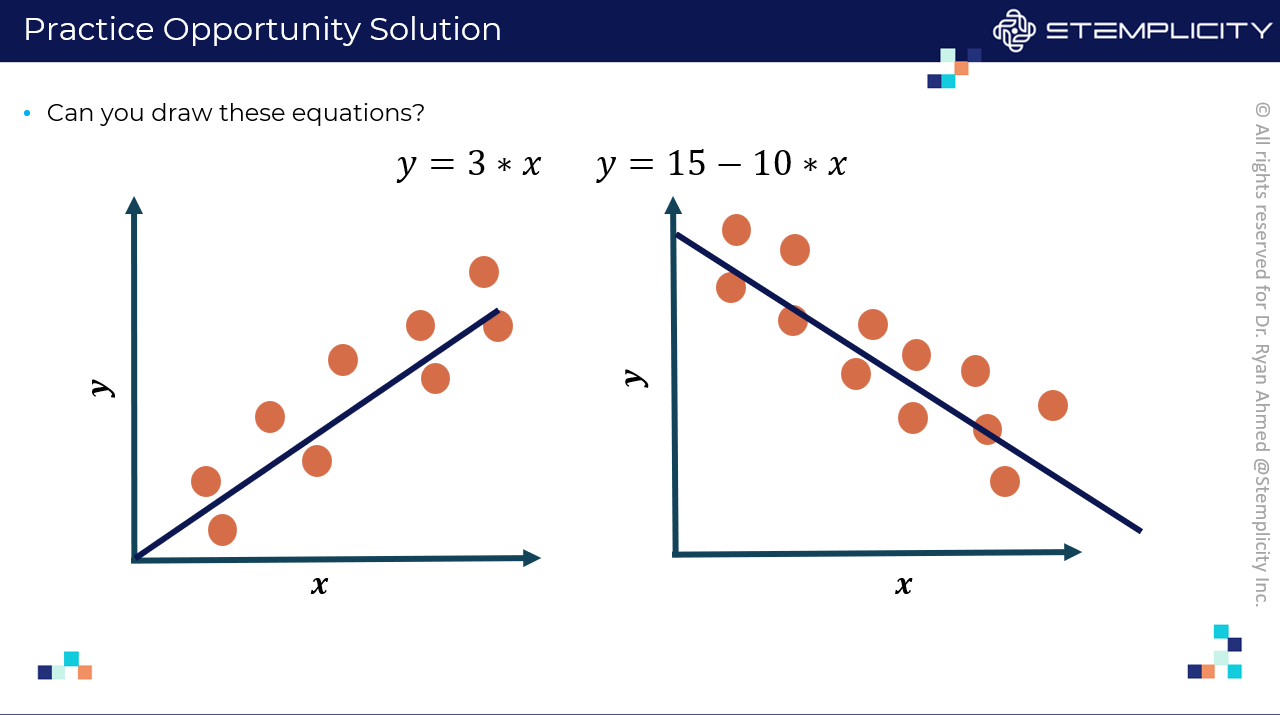

**PRACTICE OPPORTUNITY SOLUTION:**
- **Use Pandas methods to display the last 10 rows of the Pandas DataFrame df**
- **How many unique products exist in this DataFrame?**
- **List the number of countries and platforms that exist in the Pandas DataFrame**

In [14]:
df.tail(7)

Date        Product Name    Category  Units Sold  Price  Discount  \
4377  2025-03-31           Magnesium     Mineral         479  28.45      0.25   
4378  2025-03-31         Ashwagandha      Herbal         140  58.08      0.24   
4379  2025-03-31           Melatonin   Sleep Aid         300  47.79      0.21   
4380  2025-03-31              Biotin     Vitamin         538  38.12      0.22   
4381  2025-03-31   Green Tea Extract  Fat Burner        1682  20.40      0.12   
4382  2025-03-31     Iron Supplement     Mineral        2093  18.31      0.23   
4383  2025-03-31  Electrolyte Powder   Hydration         606  39.12      0.23   

     Location Platform  
4377       UK  Walmart  
4378   Canada   Amazon  
4379      USA    iHerb  
4380       UK  Walmart  
4381      USA    iHerb  
4382   Canada   Amazon  
4383       UK    iHerb

In [19]:
df['Location'].unique()

array(['Canada', 'UK', 'USA'], dtype=object)

In [20]:
df['Platform'].unique()

array(['Walmart', 'Amazon', 'iHerb'], dtype=object)

In [21]:
print(df['Product Name'].nunique())
print(df['Product Name'].unique())

16
['Whey Protein' 'Vitamin C' 'Fish Oil' 'Multivitamin' 'Pre-Workout' 'BCAA'
 'Creatine' 'Zinc' 'Collagen Peptides' 'Magnesium' 'Ashwagandha'
 'Melatonin' 'Biotin' 'Green Tea Extract' 'Iron Supplement'
 'Electrolyte Powder']


**PRACTICE OPPORTUNITY SOLUTION:**
- **Load the raw dataset again and put the result in a Pandas DataFrame titled `df_practice_opportunity`.**
- **Leverage the `mean` strategy to perform data imputation instead of the `median` strategy.**
- **Since the missing values are very few, we can drop the rows with missing values. Try using `df.dropna()` to drop the rows with missing values.**

In [23]:
# Apply the Mean Imputation Method
# Let's read the raw dataset again
file_path = "Supplement_Sales_Weekly.csv"
df_practice_opportunity = pd.read_csv(file_path)
df_practice_opportunity.isnull().sum()

Date            0
Product Name    0
Category        0
Units Sold      0
Price           8
Discount        5
Location        0
Platform        0
dtype: int64

In [24]:
# Let's perform Mean imputation
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy = "mean")
df_practice_opportunity[["Price", "Discount"]] = mean_imputer.fit_transform(df_practice_opportunity[["Price", "Discount"]])
print(df_practice_opportunity.isnull().sum())

Date            0
Product Name    0
Category        0
Units Sold      0
Price           0
Discount        0
Location        0
Platform        0
dtype: int64


In [25]:
# Let's read the raw dataset again and Drop any row containing missing values
file_path = "Supplement_Sales_Weekly.csv"
df_practice_opportunity = pd.read_csv(file_path)
print(f"Rows before dropping: {df_practice_opportunity.shape[0]}")

# Let's drop rows with missing values
df_practice_opportunity = df_practice_opportunity.dropna(subset = ["Price", "Discount"])
print(f"Rows after dropping: {df_practice_opportunity.shape[0]}")

Rows before dropping: 4384
Rows after dropping: 4371


**PRACTICE OPPORTUNITY SOLUTION:** 
- **Examine the correlation heatmap generated above. Which numerical feature has the strongest positive correlation with `Units Sold` (excluding `Units Sold` itself)? Does this make sense?**
- **Which `Platform` (Amazon, Walmart, iHerb) appears to have the highest *median* `Units Sold` based on the box plots generated above?**
- **Generate a count plot specifically for the `Location` column. Which location has the most entries in the dataset?**

In [32]:
df

Date        Product Name     Category  Units Sold  Price  \
0     2020-01-06        Whey Protein      Protein         161  31.98   
1     2020-01-06           Vitamin C      Vitamin         135  42.51   
2     2020-01-06            Fish Oil        Omega        2604  12.91   
3     2020-01-06        Multivitamin      Vitamin         949  16.07   
4     2020-01-06         Pre-Workout  Performance         551  35.47   
...          ...                 ...          ...         ...    ...   
4379  2025-03-31           Melatonin    Sleep Aid         300  47.79   
4380  2025-03-31              Biotin      Vitamin         538  38.12   
4381  2025-03-31   Green Tea Extract   Fat Burner        1682  20.40   
4382  2025-03-31     Iron Supplement      Mineral        2093  18.31   
4383  2025-03-31  Electrolyte Powder    Hydration         606  39.12   

      Discount Location Platform  
0         0.03   Canada  Walmart  
1         0.04       UK   Amazon  
2         0.25   Canada   Amazon  
3         0.08   Canada  Walmart  
4         0.25   Canada    iHerb  
...        ...      ...      ...  
4379      0.21      USA    iHerb  
4380      0.22       UK  Walmart  
4381      0.12      USA    iHerb  
4382      0.23   Canada   Amazon  
4383      0.23       UK    iHerb  

[4384 rows x 8 columns]

In [33]:
# Let's display the strongest positive correlation with Units sold
numeric_df = df.select_dtypes(include = "number")
revenue_corr = numeric_df.corr()["Units Sold"].drop("Units Sold")
best_feature = revenue_corr.idxmax()
best_corr_value = revenue_corr.max()
print(f"Highest positive correlation with units sold: {best_feature} ({best_corr_value:.2f})")

Highest positive correlation with units sold: Discount (0.23)


In [34]:
# The Platform with the highest median Revenue
platform_median = df.groupby("Platform")["Units Sold"].median().sort_values(ascending = False)
print(platform_median)

Platform
Amazon     320.0
iHerb      310.0
Walmart    307.0
Name: Units Sold, dtype: float64


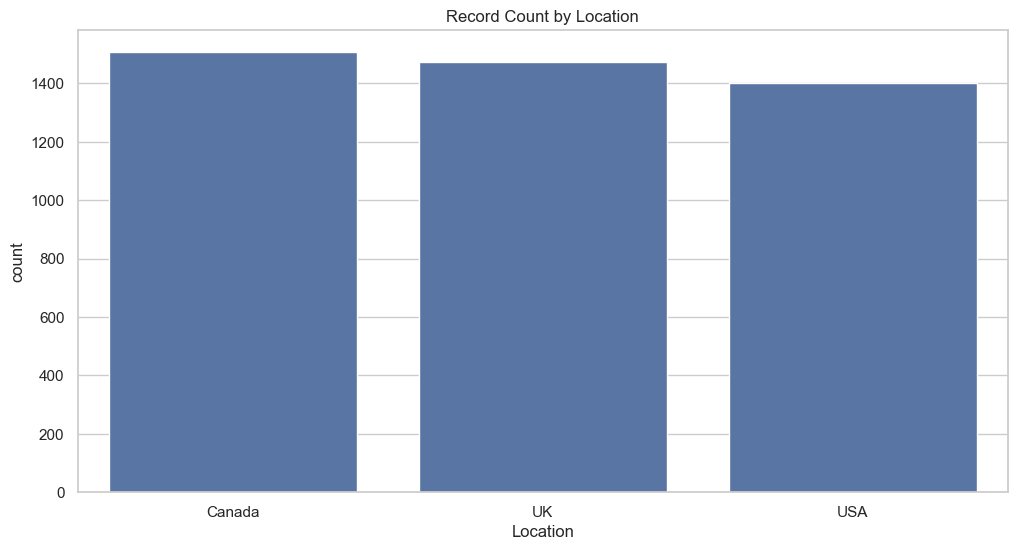

In [35]:
# Let's plot the count plot for Location
sns.countplot(x = "Location", data = df)
plt.title("Record Count by Location")
plt.show()

**PRACTICE OPPORTUNITY SOLUTION:**
- **Enable data shuffling and split the data into 30% for testing and 70% for training? display the dataframe, what do you conclude?**
- **Verify the number of rows in `X_train` and `X_test`. Do they add up to the total number of rows in the original dataset (`df.shape[0]`)?**

In [43]:
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


Splitting data into training and testing sets...
Training set shape (X_train): (3068, 15)
Testing set shape (X_test): (1316, 15)
Training target shape (y_train): (3068,)
Testing target shape (y_test): (1316,)


In [44]:
X_train

Price  Discount  Category_Fat Burner  Category_Herbal  \
950   15.64      0.22                False            False   
2933  58.33      0.18                False            False   
3897  28.24      0.25                False            False   
2604  33.17      0.17                False            False   
2066  55.19      0.23                False            False   
...     ...       ...                  ...              ...   
3763  31.49      0.12                False            False   
3956  54.38      0.06                False            False   
386   38.84      0.12                False            False   
841   56.87      0.17                False            False   
2498  23.62      0.21                False            False   

      Category_Hydration  Category_Mineral  Category_Omega  \
950                False             False           False   
2933               False             False           False   
3897               False              True           False   
2604               False             False           False   
2066               False             False            True   
...                  ...               ...             ...   
3763               False             False           False   
3956               False             False           False   
386                False             False            True   
841                False              True           False   
2498               False             False            True   

      Category_Performance  Category_Protein  Category_Sleep Aid  \
950                   True             False               False   
2933                 False             False               False   
3897                 False             False               False   
2604                 False             False               False   
2066                 False             False               False   
...                    ...               ...                 ...   
3763                 False             False               False   
3956                  True             False               False   
386                  False             False               False   
841                  False             False               False   
2498                 False             False               False   

      Category_Vitamin  Location_UK  Location_USA  Platform_Walmart  \
950              False        False          True              True   
2933             False         True         False             False   
3897             False         True         False             False   
2604              True        False         False              True   
2066             False        False          True             False   
...                ...          ...           ...               ...   
3763              True        False          True              True   
3956             False         True         False             False   
386              False         True         False             False   
841              False        False         False              True   
2498             False        False         False             False   

      Platform_iHerb  
950            False  
2933           False  
3897            True  
2604           False  
2066           False  
...              ...  
3763           False  
3956           False  
386             True  
841            False  
2498            True  

[3068 rows x 15 columns]

In [45]:
# ️Verify split row counts
print(X_train.shape[0] + X_test.shape[0] == df.shape[0])

True


In [46]:
X_train.shape[0]

3068

In [47]:
X_test.shape[0]

1316

In [48]:
df.shape[0]

4384

**PRACTICE OPPORTUNITY SOLUTION:**
- **Based on the R-squared (R²) value calculated above for the Linear Regression model, would you say the model provides a good fit for explaining the variance in `Units Sold`? Why or why not? (e.g., Is R² closer to 1 or 0?)**
- **What does the RMSE value tell you about the typical prediction error of the linear model in terms of dollars or units sold?**

In [51]:
print(f"Linear R² = {r2_linear:.4f}")
print(f"Linear RMSE = {rmse_linear:.2f}")

# Quick interpretation
if r2_linear > 0.9:
    print("Excellent explanatory power.")
elif r2_linear > 0.7:
    print("Good fit.")
else:
    print("Model may be under‑fitting; consider non‑linear models.")

Linear R² = 0.6773
Linear RMSE = 319.87
Model may be under‑fitting; consider non‑linear models.


**PRACTICE OPPORTUNITY SOLUTION:**
- **XG-Boost is a powerful algorithm that can solve both regression and classification-type problems. Train an XG-boost algorithm to predict units sold.**
- **Compare the performance of XG-Boost to linear regression and Random Forest algorithms**
- *Note: you will need to install xgboost and conduct external research*

In [56]:
!pip install xgboost

In [58]:
print("Building and evaluating XGBoost Regressor model...")

# 1. Initialize the XGBoost Regressor model
# n_estimators: number of boosting rounds
# learning_rate: step size shrinkage used to prevent overfitting
# max_depth: maximum depth of a tree
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# xgb_model = xgb.XGBRegressor(
#     n_estimators=100, 
#     learning_rate=0.1, 
#     max_depth=6, 
#     random_state=42,
#     n_jobs=-1)
xgb_model = xgb.XGBRegressor(random_state=42)

# 2. Train the model
print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Model training complete.")

# 3. Make predictions on the test set
print("Making predictions on the test set...")
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate the model
print("\nEvaluating XGBoost Model:")
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f" Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f" Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f" R-squared (R²): {r2_xgb:.4f}")

# 5. Compare all models: Linear Regression vs Random Forest vs XGBoost
print("\n--- Model Comparison ---")

# Print R-squared values
print(f"Linear Regression R²: {r2_linear:.4f}")
print(f"Random Forest R²:    {r2_rf:.4f}")
print(f"XGBoost R²:           {r2_xgb:.4f}\n")

# Print RMSE values
print(f"Linear Regression RMSE: {rmse_linear:.2f}")
print(f"Random Forest RMSE:     {rmse_rf:.2f}")
print(f"XGBoost RMSE:            {rmse_xgb:.2f}\n")

# Find which model performed best based on R²
r2_scores = {'Linear Regression': r2_linear, 'Random Forest': r2_rf, 'XGBoost': r2_xgb}
best_model_r2 = max(r2_scores, key=r2_scores.get)
print(f"Best model based on R²: {best_model_r2}")

# Find which model performed best based on RMSE (lower is better)
rmse_scores = {'Linear Regression': rmse_linear, 'Random Forest': rmse_rf, 'XGBoost': rmse_xgb}
best_model_rmse = min(rmse_scores, key=rmse_scores.get)
print(f"Best model based on RMSE: {best_model_rmse}")

Building and evaluating XGBoost Regressor model...
Training the XGBoost model...
Model training complete.
Making predictions on the test set...

Evaluating XGBoost Model:
 Mean Absolute Error (MAE): 151.25
 Mean Squared Error (MSE): 73431.56
 Root Mean Squared Error (RMSE): 270.98
 R-squared (R²): 0.7684

--- Model Comparison ---
Linear Regression R²: 0.6773
Random Forest R²:    0.8093
XGBoost R²:           0.7684

Linear Regression RMSE: 319.87
Random Forest RMSE:     245.88
XGBoost RMSE:            270.98

Best model based on R²: Random Forest
Best model based on RMSE: Random Forest


**PRACTICE OPPORTUNITY SOLUTION:**
- **Split the data into 75% for training and 25% for testing. Re-train a Linear Regression, Random Forest, and XG-Boost Models and compare their performance. What do you conclude?**
- **Did the performance change with different test splits?**

In [62]:
# Train-Test Split
print("\nSplitting data into training and testing sets...")
# test_size=0.1 means 10% of the data is for testing, 90% for training
# random_state ensures reproducibility - the split is the same each time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


Splitting data into training and testing sets...
Training set shape (X_train): (3068, 15)
Testing set shape (X_test): (1316, 15)
Training target shape (y_train): (3068,)
Testing target shape (y_test): (1316,)


In [63]:
# Train a linear regression model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Calculate Root Mean Squared Error
r2_linear = r2_score(y_test, y_pred_linear)

In [64]:
# Train a Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state = 42)  # Use out-of-bag samples for validation estimate
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [65]:
# Train an XG-Boost Model
xgb_model = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state = 42, n_jobs = -1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [66]:
# Print R-squared values
print(f"Linear Regression R²: {r2_linear:.4f}")
print(f"Random Forest R²:    {r2_rf:.4f}")
print(f"XGBoost R²:           {r2_xgb:.4f}\n")

# Print RMSE values
print(f"Linear Regression RMSE: {rmse_linear:.2f}")
print(f"Random Forest RMSE:     {rmse_rf:.2f}")
print(f"XGBoost RMSE:            {rmse_xgb:.2f}\n")

Linear Regression R²: 0.6581
Random Forest R²:    0.7910
XGBoost R²:           0.7831

Linear Regression RMSE: 347.55
Random Forest RMSE:     271.69
XGBoost RMSE:            276.82



- Initial Model Run
    - Linear Regression R²: 0.6741
    - Random Forest R²:    0.7972
    - XGBoost R²:           0.7862
    - Linear Regression RMSE: 328.08
    - Random Forest RMSE:     258.79
    - XGBoost RMSE:            265.72

- New 30%-70% Train-Test Split With shuffling
    - Linear Regression R²: 0.6716
    - Random Forest R²:    0.7997
    - XGBoost R²:           0.8055
    - Linear Regression RMSE: 318.45
    - Random Forest RMSE:     248.68
    - XGBoost RMSE:            245.04

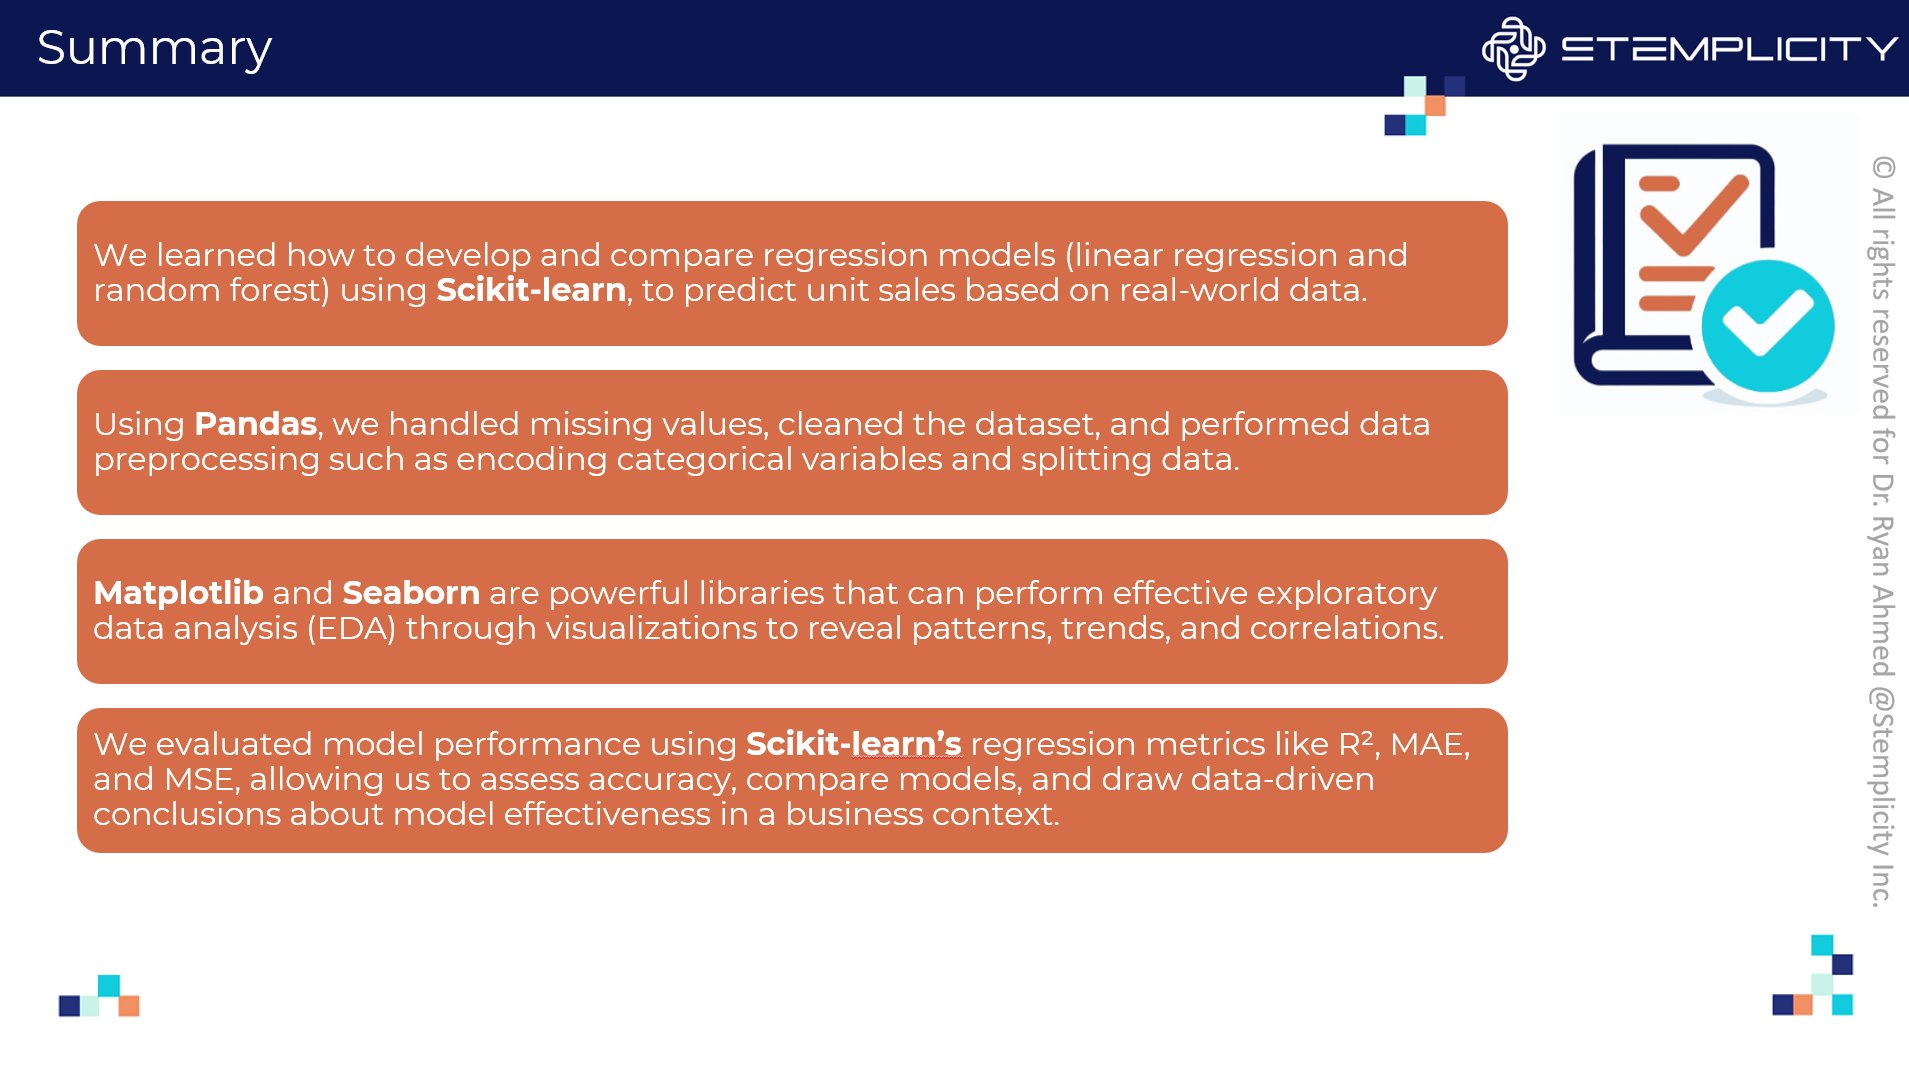

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

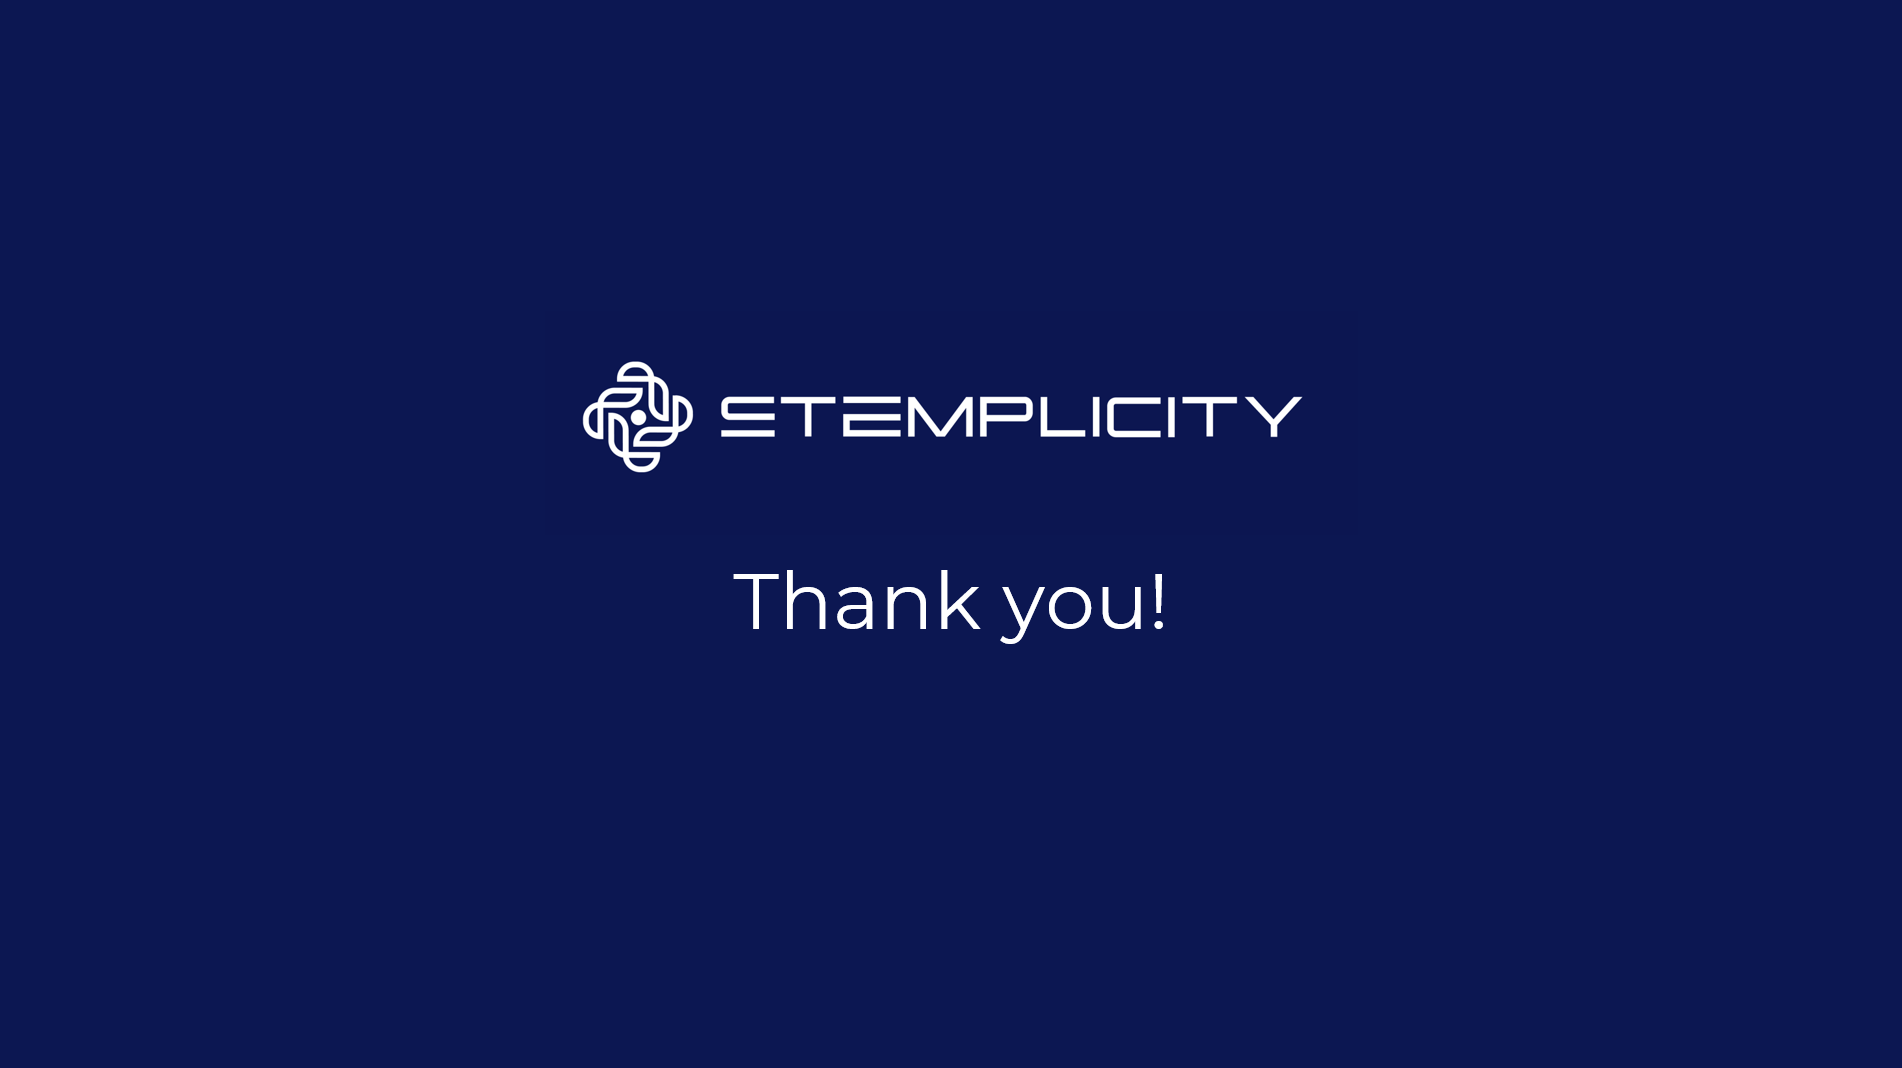